In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
necoc = 100
generations = int(3000/necoc)
generations

30

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

43


In [7]:
len(number_codes[0])

100

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/100".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/100
number of class1:650
number of class2:967

 ****** Running generation 0 ****** 

Population's average fitness: 0.51501 stdev: 0.09081
Best fitness: 0.69635 - size: (2, 13) - species 1 - id 24
Average adjusted fitness: 0.246
Mean genetic distance 2.987, standard deviation 0.472
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 16.425 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54977 stdev: 0.09133
Best fitness: 0.70377 - size: (2, 14) - species 4 - id 281
Average adjusted fitness: 0.236
Mean genetic distance 3.085, standard deviation 0.494
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 13.167 sec (14.796 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54159 stdev: 0.09800
Best fitness: 0.71738 - size: (4, 17) - species 3 - id 498
Average adjusted fitness: 0.193
Mean genetic distance 3.090, standard deviation 0.484
Population of 204 members in 41 species

Population's average fitness: 0.62391 stdev: 0.10139
Best fitness: 0.78293 - size: (3, 17) - species 13 - id 2809
Average adjusted fitness: 0.332
Mean genetic distance 3.286, standard deviation 0.495
Population of 190 members in 37 species
Total extinctions: 0
Generation time: 16.172 sec (16.207 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62813 stdev: 0.09369
Best fitness: 0.79035 - size: (4, 19) - species 13 - id 3047
Average adjusted fitness: 0.263
Mean genetic distance 3.269, standard deviation 0.508
Population of 191 members in 34 species
Total extinctions: 0
Generation time: 23.275 sec (16.924 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.62231 stdev: 0.10010
Best fitness: 0.79035 - size: (4, 19) - species 13 - id 3047
Average adjusted fitness: 0.231
Mean genetic distance 3.289, standard deviation 0.509
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 20.848 sec (17.405 average)

 

Population's average fitness: 0.60512 stdev: 0.08270
Best fitness: 0.75758 - size: (3, 16) - species 12 - id 1682
Average adjusted fitness: 0.210
Mean genetic distance 3.278, standard deviation 0.476
Population of 198 members in 46 species
Total extinctions: 0
Generation time: 16.498 sec (16.209 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.59735 stdev: 0.09384
Best fitness: 0.75758 - size: (3, 16) - species 12 - id 1682
Average adjusted fitness: 0.217
Mean genetic distance 3.297, standard deviation 0.494
Population of 189 members in 42 species
Total extinctions: 0
Generation time: 17.585 sec (16.400 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61122 stdev: 0.08083
Best fitness: 0.75758 - size: (3, 16) - species 12 - id 1682
Average adjusted fitness: 0.271
Mean genetic distance 3.278, standard deviation 0.488
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 15.301 sec (16.383 average)

 

Population's average fitness: 0.59964 stdev: 0.09620
Best fitness: 0.82189 - size: (4, 18) - species 39 - id 1717
Average adjusted fitness: 0.178
Mean genetic distance 3.149, standard deviation 0.490
Population of 195 members in 45 species
Total extinctions: 0
Generation time: 15.724 sec (15.213 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61819 stdev: 0.10294
Best fitness: 0.82189 - size: (4, 18) - species 39 - id 1717
Average adjusted fitness: 0.251
Mean genetic distance 3.172, standard deviation 0.493
Population of 200 members in 45 species
Total extinctions: 0
Generation time: 19.871 sec (15.507 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61899 stdev: 0.10178
Best fitness: 0.82189 - size: (4, 18) - species 39 - id 1717
Average adjusted fitness: 0.177
Mean genetic distance 3.161, standard deviation 0.486
Population of 194 members in 45 species
Total extinctions: 0
Generation time: 18.530 sec (15.937 average)

 

Population's average fitness: 0.62779 stdev: 0.12760
Best fitness: 0.74892 - size: (5, 19) - species 30 - id 935
Average adjusted fitness: 0.311
Mean genetic distance 3.106, standard deviation 0.510
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 15.726 sec (13.736 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61471 stdev: 0.14000
Best fitness: 0.74892 - size: (5, 19) - species 30 - id 935
Average adjusted fitness: 0.289
Mean genetic distance 3.158, standard deviation 0.509
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 20.176 sec (14.541 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62755 stdev: 0.13261
Best fitness: 0.75510 - size: (5, 21) - species 8 - id 1333
Average adjusted fitness: 0.317
Mean genetic distance 3.163, standard deviation 0.503
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 19.425 sec (15.084 average)

 *****

Population's average fitness: 0.51632 stdev: 0.08574
Best fitness: 0.67842 - size: (2, 13) - species 1 - id 155
Average adjusted fitness: 0.167
Mean genetic distance 2.954, standard deviation 0.455
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 7.394 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55338 stdev: 0.08185
Best fitness: 0.67842 - size: (2, 13) - species 1 - id 155
Average adjusted fitness: 0.195
Mean genetic distance 3.015, standard deviation 0.452
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 8.093 sec (7.744 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57054 stdev: 0.07968
Best fitness: 0.68089 - size: (4, 16) - species 17 - id 435
Average adjusted fitness: 0.258
Mean genetic distance 2.993, standard deviation 0.452
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 10.810 sec (8.766 average)

 ****** Running generation 3 

Population's average fitness: 0.61146 stdev: 0.09224
Best fitness: 0.73717 - size: (4, 17) - species 24 - id 1389
Average adjusted fitness: 0.263
Mean genetic distance 3.238, standard deviation 0.489
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 11.174 sec (9.513 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61734 stdev: 0.08560
Best fitness: 0.73779 - size: (6, 20) - species 24 - id 3256
Average adjusted fitness: 0.290
Mean genetic distance 3.209, standard deviation 0.483
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 10.210 sec (9.638 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.61826 stdev: 0.08423
Best fitness: 0.73779 - size: (6, 20) - species 24 - id 3256
Average adjusted fitness: 0.234
Mean genetic distance 3.231, standard deviation 0.480
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 10.237 sec (9.720 average)

 ***

Population's average fitness: 0.63947 stdev: 0.13975
Best fitness: 0.80272 - size: (5, 17) - species 36 - id 2169
Average adjusted fitness: 0.351
Mean genetic distance 3.158, standard deviation 0.488
Population of 192 members in 32 species
Total extinctions: 0
Generation time: 12.049 sec (12.966 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63275 stdev: 0.14266
Best fitness: 0.80272 - size: (5, 17) - species 36 - id 2169
Average adjusted fitness: 0.332
Mean genetic distance 3.137, standard deviation 0.487
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 14.464 sec (13.342 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.64183 stdev: 0.13842
Best fitness: 0.80272 - size: (5, 17) - species 36 - id 2169
Average adjusted fitness: 0.343
Mean genetic distance 3.127, standard deviation 0.498
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 14.575 sec (13.072 average)

 

Population's average fitness: 0.62700 stdev: 0.11286
Best fitness: 0.79839 - size: (4, 16) - species 7 - id 826
Average adjusted fitness: 0.301
Mean genetic distance 3.197, standard deviation 0.483
Population of 196 members in 44 species
Total extinctions: 0
Generation time: 10.416 sec (11.359 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64277 stdev: 0.10200
Best fitness: 0.79839 - size: (4, 16) - species 7 - id 826
Average adjusted fitness: 0.342
Mean genetic distance 3.205, standard deviation 0.486
Population of 200 members in 46 species
Total extinctions: 0
Generation time: 12.069 sec (11.505 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62925 stdev: 0.12041
Best fitness: 0.79839 - size: (4, 16) - species 7 - id 826
Average adjusted fitness: 0.304
Mean genetic distance 3.225, standard deviation 0.482
Population of 205 members in 46 species
Total extinctions: 0
Generation time: 13.309 sec (11.596 average)

 ******

Population's average fitness: 0.63614 stdev: 0.13371
Best fitness: 0.75943 - size: (4, 16) - species 1 - id 511
Average adjusted fitness: 0.360
Mean genetic distance 3.076, standard deviation 0.483
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 9.922 sec (9.772 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63992 stdev: 0.12825
Best fitness: 0.75943 - size: (4, 16) - species 1 - id 511
Average adjusted fitness: 0.374
Mean genetic distance 3.141, standard deviation 0.489
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 12.343 sec (10.094 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64164 stdev: 0.13233
Best fitness: 0.77118 - size: (5, 18) - species 1 - id 1395
Average adjusted fitness: 0.346
Mean genetic distance 3.167, standard deviation 0.507
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 10.842 sec (10.177 average)

 ****** Ru

Population's average fitness: 0.50080 stdev: 0.04859
Best fitness: 0.64626 - size: (2, 13) - species 2 - id 50
Average adjusted fitness: 0.185
Mean genetic distance 2.933, standard deviation 0.446
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 7.389 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52472 stdev: 0.05202
Best fitness: 0.68584 - size: (3, 15) - species 7 - id 330
Average adjusted fitness: 0.135
Mean genetic distance 3.014, standard deviation 0.456
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 7.795 sec (7.592 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54710 stdev: 0.05856
Best fitness: 0.69511 - size: (3, 16) - species 7 - id 517
Average adjusted fitness: 0.163
Mean genetic distance 2.991, standard deviation 0.469
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 8.050 sec (7.745 average)

 ****** Running generation 3 ***

Population's average fitness: 0.61860 stdev: 0.08840
Best fitness: 0.78293 - size: (7, 20) - species 6 - id 2174
Average adjusted fitness: 0.191
Mean genetic distance 3.238, standard deviation 0.470
Population of 189 members in 35 species
Total extinctions: 0
Generation time: 14.346 sec (17.667 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61160 stdev: 0.09251
Best fitness: 0.78293 - size: (7, 20) - species 6 - id 2174
Average adjusted fitness: 0.162
Mean genetic distance 3.231, standard deviation 0.463
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 14.193 sec (17.402 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.60281 stdev: 0.09160
Best fitness: 0.78293 - size: (7, 20) - species 6 - id 2174
Average adjusted fitness: 0.166
Mean genetic distance 3.241, standard deviation 0.470
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 18.128 sec (17.450 average)

 ***

Population's average fitness: 0.61835 stdev: 0.10472
Best fitness: 0.75943 - size: (4, 16) - species 12 - id 560
Average adjusted fitness: 0.247
Mean genetic distance 3.268, standard deviation 0.459
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 16.574 sec (14.501 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62143 stdev: 0.09571
Best fitness: 0.75943 - size: (4, 16) - species 12 - id 560
Average adjusted fitness: 0.227
Mean genetic distance 3.271, standard deviation 0.468
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 15.495 sec (14.751 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61596 stdev: 0.10123
Best fitness: 0.75943 - size: (4, 16) - species 12 - id 560
Average adjusted fitness: 0.264
Mean genetic distance 3.266, standard deviation 0.464
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 15.310 sec (14.850 average)

 ***

Population's average fitness: 0.77356 stdev: 0.24838
Best fitness: 0.94249 - size: (5, 20) - species 30 - id 1562
Average adjusted fitness: 0.653
Mean genetic distance 3.107, standard deviation 0.486
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 14.244 sec (20.723 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.80598 stdev: 0.20955
Best fitness: 0.94249 - size: (5, 20) - species 30 - id 1562
Average adjusted fitness: 0.666
Mean genetic distance 3.089, standard deviation 0.485
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 14.208 sec (19.459 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.77354 stdev: 0.24446
Best fitness: 0.95671 - size: (6, 25) - species 10 - id 2002
Average adjusted fitness: 0.650
Mean genetic distance 3.095, standard deviation 0.492
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 15.280 sec (18.448 average)

 

Population's average fitness: 0.56511 stdev: 0.07678
Best fitness: 0.74521 - size: (2, 12) - species 21 - id 538
Average adjusted fitness: 0.245
Mean genetic distance 3.079, standard deviation 0.472
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 18.480 sec (18.570 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.56279 stdev: 0.08063
Best fitness: 0.76562 - size: (4, 19) - species 38 - id 1192
Average adjusted fitness: 0.217
Mean genetic distance 3.100, standard deviation 0.494
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 23.733 sec (19.215 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57001 stdev: 0.07904
Best fitness: 0.77922 - size: (3, 14) - species 21 - id 1310
Average adjusted fitness: 0.165
Mean genetic distance 3.129, standard deviation 0.504
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 17.716 sec (19.049 average)

 ***

Population's average fitness: 0.52418 stdev: 0.08980
Best fitness: 0.67594 - size: (2, 13) - species 2 - id 55
Average adjusted fitness: 0.176
Mean genetic distance 2.940, standard deviation 0.464
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 10.784 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54841 stdev: 0.09184
Best fitness: 0.72109 - size: (3, 15) - species 1 - id 249
Average adjusted fitness: 0.211
Mean genetic distance 3.020, standard deviation 0.470
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 12.943 sec (11.864 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55604 stdev: 0.09657
Best fitness: 0.74150 - size: (3, 16) - species 14 - id 449
Average adjusted fitness: 0.250
Mean genetic distance 3.081, standard deviation 0.481
Population of 206 members in 35 species
Total extinctions: 0
Generation time: 19.045 sec (14.257 average)

 ****** Running generation

Population's average fitness: 0.61281 stdev: 0.09046
Best fitness: 0.76747 - size: (4, 16) - species 23 - id 3201
Average adjusted fitness: 0.267
Mean genetic distance 3.188, standard deviation 0.489
Population of 193 members in 32 species
Total extinctions: 0
Generation time: 14.658 sec (13.878 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61412 stdev: 0.09030
Best fitness: 0.76747 - size: (4, 16) - species 23 - id 3201
Average adjusted fitness: 0.218
Mean genetic distance 3.216, standard deviation 0.494
Population of 192 members in 32 species
Total extinctions: 0
Generation time: 13.991 sec (13.866 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.61369 stdev: 0.09004
Best fitness: 0.76747 - size: (4, 16) - species 23 - id 3201
Average adjusted fitness: 0.233
Mean genetic distance 3.242, standard deviation 0.496
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 14.064 sec (13.924 average)

 

Population's average fitness: 0.69222 stdev: 0.19280
Best fitness: 0.87879 - size: (6, 22) - species 6 - id 2070
Average adjusted fitness: 0.475
Mean genetic distance 3.143, standard deviation 0.481
Population of 192 members in 28 species
Total extinctions: 0
Generation time: 13.530 sec (14.062 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.69436 stdev: 0.19676
Best fitness: 0.87879 - size: (6, 22) - species 6 - id 2070
Average adjusted fitness: 0.491
Mean genetic distance 3.117, standard deviation 0.493
Population of 207 members in 25 species
Total extinctions: 0
Generation time: 13.655 sec (13.979 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.68781 stdev: 0.18774
Best fitness: 0.88064 - size: (5, 19) - species 15 - id 3015
Average adjusted fitness: 0.489
Mean genetic distance 3.109, standard deviation 0.503
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 14.536 sec (14.164 average)

 **

Population's average fitness: 0.56165 stdev: 0.05661
Best fitness: 0.67842 - size: (7, 22) - species 10 - id 1795
Average adjusted fitness: 0.157
Mean genetic distance 3.255, standard deviation 0.509
Population of 201 members in 44 species
Total extinctions: 0
Generation time: 13.217 sec (13.568 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.55783 stdev: 0.06006
Best fitness: 0.67842 - size: (7, 22) - species 10 - id 1795
Average adjusted fitness: 0.169
Mean genetic distance 3.230, standard deviation 0.515
Population of 205 members in 44 species
Total extinctions: 0
Generation time: 14.357 sec (13.592 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.56041 stdev: 0.05852
Best fitness: 0.67842 - size: (7, 22) - species 10 - id 1795
Average adjusted fitness: 0.157
Mean genetic distance 3.222, standard deviation 0.504
Population of 194 members in 45 species
Total extinctions: 0
Generation time: 23.178 sec (14.504 average)

 

Population's average fitness: 0.69326 stdev: 0.18014
Best fitness: 0.83241 - size: (4, 15) - species 25 - id 1073
Average adjusted fitness: 0.491
Mean genetic distance 3.019, standard deviation 0.485
Population of 207 members in 31 species
Total extinctions: 0
Generation time: 26.417 sec (23.859 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.70061 stdev: 0.18677
Best fitness: 0.83241 - size: (4, 15) - species 25 - id 1073
Average adjusted fitness: 0.498
Mean genetic distance 3.053, standard deviation 0.488
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 26.535 sec (24.193 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.72464 stdev: 0.16381
Best fitness: 0.84416 - size: (4, 15) - species 25 - id 1420
Average adjusted fitness: 0.518
Mean genetic distance 3.034, standard deviation 0.472
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 23.590 sec (24.126 average)

 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.50006 stdev: 0.05169
Best fitness: 0.68275 - size: (2, 13) - species 4 - id 98
Average adjusted fitness: 0.164
Mean genetic distance 2.958, standard deviation 0.509
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 18.250 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52369 stdev: 0.05649
Best fitness: 0.68955 - size: (2, 14) - species 5 - id 335
Average adjusted fitness: 0.141
Mean genetic distance 3.007, standard deviation 0.509
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 19.521 sec (18.886 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53516 stdev: 0.05929
Best fitness: 0.72975 - size: (4, 16) - species 8 - id 489
Average adjusted fitness: 0.128
Mean genetic distance 3.041, standard deviation 0.498
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 20.102 sec (19.29

Population's average fitness: 0.59687 stdev: 0.08283
Best fitness: 0.74273 - size: (7, 22) - species 38 - id 3311
Average adjusted fitness: 0.242
Mean genetic distance 3.264, standard deviation 0.497
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 27.320 sec (29.761 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.59966 stdev: 0.08140
Best fitness: 0.74273 - size: (7, 22) - species 38 - id 3311
Average adjusted fitness: 0.176
Mean genetic distance 3.251, standard deviation 0.498
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 27.548 sec (29.930 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.59960 stdev: 0.08420
Best fitness: 0.74273 - size: (7, 22) - species 38 - id 3311
Average adjusted fitness: 0.263
Mean genetic distance 3.272, standard deviation 0.490
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 26.249 sec (29.819 average)

 

Population's average fitness: 0.61767 stdev: 0.09686
Best fitness: 0.74088 - size: (6, 20) - species 24 - id 2072
Average adjusted fitness: 0.259
Mean genetic distance 3.261, standard deviation 0.477
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 41.985 sec (40.377 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61416 stdev: 0.09951
Best fitness: 0.74088 - size: (6, 20) - species 43 - id 2072
Average adjusted fitness: 0.257
Mean genetic distance 3.240, standard deviation 0.491
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 43.175 sec (39.868 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.60942 stdev: 0.10728
Best fitness: 0.74088 - size: (6, 20) - species 43 - id 2072
Average adjusted fitness: 0.263
Mean genetic distance 3.253, standard deviation 0.475
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 45.587 sec (39.426 average)

 

Population's average fitness: 0.59060 stdev: 0.08907
Best fitness: 0.76747 - size: (9, 27) - species 36 - id 1598
Average adjusted fitness: 0.189
Mean genetic distance 3.173, standard deviation 0.453
Population of 208 members in 40 species
Total extinctions: 0
Generation time: 27.801 sec (46.928 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59320 stdev: 0.08737
Best fitness: 0.76747 - size: (9, 27) - species 36 - id 1598
Average adjusted fitness: 0.216
Mean genetic distance 3.175, standard deviation 0.456
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 29.871 sec (45.155 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59804 stdev: 0.08858
Best fitness: 0.76747 - size: (9, 27) - species 36 - id 1598
Average adjusted fitness: 0.309
Mean genetic distance 3.182, standard deviation 0.456
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 48.398 sec (44.911 average)

 

Population's average fitness: 0.58473 stdev: 0.08777
Best fitness: 0.79777 - size: (5, 17) - species 17 - id 1022
Average adjusted fitness: 0.244
Mean genetic distance 3.159, standard deviation 0.483
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 15.060 sec (13.842 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60094 stdev: 0.08750
Best fitness: 0.79777 - size: (5, 17) - species 17 - id 1022
Average adjusted fitness: 0.213
Mean genetic distance 3.205, standard deviation 0.482
Population of 191 members in 38 species
Total extinctions: 0
Generation time: 15.493 sec (14.048 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61027 stdev: 0.08771
Best fitness: 0.79777 - size: (5, 17) - species 17 - id 1022
Average adjusted fitness: 0.197
Mean genetic distance 3.227, standard deviation 0.478
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 15.207 sec (14.177 average)

 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.51492 stdev: 0.08183
Best fitness: 0.71429 - size: (2, 13) - species 1 - id 93
Average adjusted fitness: 0.240
Mean genetic distance 2.971, standard deviation 0.493
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 14.813 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54473 stdev: 0.08295
Best fitness: 0.71429 - size: (2, 13) - species 2 - id 93
Average adjusted fitness: 0.278
Mean genetic distance 3.083, standard deviation 0.502
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 15.183 sec (14.998 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55922 stdev: 0.08551
Best fitness: 0.75015 - size: (3, 15) - species 26 - id 487
Average adjusted fitness: 0.258
Mean genetic distance 3.138, standard deviation 0.511
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 24.752 sec (18.24

Population's average fitness: 0.62639 stdev: 0.08888
Best fitness: 0.79406 - size: (4, 18) - species 26 - id 2299
Average adjusted fitness: 0.309
Mean genetic distance 3.253, standard deviation 0.501
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 29.630 sec (26.193 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62491 stdev: 0.08548
Best fitness: 0.79406 - size: (4, 18) - species 26 - id 2299
Average adjusted fitness: 0.229
Mean genetic distance 3.270, standard deviation 0.501
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 32.149 sec (27.365 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.61850 stdev: 0.09160
Best fitness: 0.79406 - size: (4, 18) - species 26 - id 2299
Average adjusted fitness: 0.287
Mean genetic distance 3.300, standard deviation 0.515
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 26.728 sec (27.473 average)

 

Population's average fitness: 0.65886 stdev: 0.14000
Best fitness: 0.81694 - size: (5, 20) - species 36 - id 1509
Average adjusted fitness: 0.349
Mean genetic distance 3.318, standard deviation 0.494
Population of 193 members in 33 species
Total extinctions: 0
Generation time: 17.789 sec (22.315 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.64471 stdev: 0.14752
Best fitness: 0.81694 - size: (5, 20) - species 36 - id 1509
Average adjusted fitness: 0.348
Mean genetic distance 3.328, standard deviation 0.500
Population of 193 members in 32 species
Total extinctions: 0
Generation time: 17.491 sec (21.495 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.65438 stdev: 0.14459
Best fitness: 0.81694 - size: (5, 20) - species 36 - id 1509
Average adjusted fitness: 0.367
Mean genetic distance 3.305, standard deviation 0.508
Population of 193 members in 32 species
Total extinctions: 0
Generation time: 22.020 sec (21.447 average)

 

Population's average fitness: 0.60449 stdev: 0.09423
Best fitness: 0.73098 - size: (5, 20) - species 47 - id 1667
Average adjusted fitness: 0.269
Mean genetic distance 3.234, standard deviation 0.471
Population of 203 members in 50 species
Total extinctions: 0
Generation time: 33.544 sec (27.526 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60877 stdev: 0.08587
Best fitness: 0.73098 - size: (5, 20) - species 47 - id 1667
Average adjusted fitness: 0.259
Mean genetic distance 3.251, standard deviation 0.464
Population of 203 members in 51 species
Total extinctions: 0
Generation time: 33.079 sec (29.172 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60468 stdev: 0.08964
Best fitness: 0.73098 - size: (5, 20) - species 47 - id 1667
Average adjusted fitness: 0.252
Mean genetic distance 3.275, standard deviation 0.465
Population of 203 members in 52 species
Total extinctions: 0
Generation time: 24.230 sec (29.133 average)

 

Population's average fitness: 0.59313 stdev: 0.08963
Best fitness: 0.79344 - size: (2, 13) - species 1 - id 506
Average adjusted fitness: 0.175
Mean genetic distance 3.118, standard deviation 0.494
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 13.211 sec (15.640 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60168 stdev: 0.09651
Best fitness: 0.79344 - size: (2, 13) - species 1 - id 506
Average adjusted fitness: 0.198
Mean genetic distance 3.113, standard deviation 0.490
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 14.493 sec (15.496 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60211 stdev: 0.10385
Best fitness: 0.79344 - size: (2, 13) - species 1 - id 506
Average adjusted fitness: 0.237
Mean genetic distance 3.143, standard deviation 0.479
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 14.475 sec (15.383 average)

 ****** R

Population's average fitness: 0.50164 stdev: 0.05807
Best fitness: 0.64069 - size: (2, 13) - species 6 - id 42
Average adjusted fitness: 0.177
Mean genetic distance 2.982, standard deviation 0.485
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 10.712 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52801 stdev: 0.04969
Best fitness: 0.67842 - size: (2, 14) - species 8 - id 313
Average adjusted fitness: 0.193
Mean genetic distance 3.045, standard deviation 0.467
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 10.398 sec (10.555 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53357 stdev: 0.05863
Best fitness: 0.67842 - size: (2, 14) - species 27 - id 313
Average adjusted fitness: 0.148
Mean genetic distance 3.074, standard deviation 0.481
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 10.513 sec (10.541 average)

 ****** Running generation

Population's average fitness: 0.60452 stdev: 0.07141
Best fitness: 0.74150 - size: (3, 17) - species 37 - id 791
Average adjusted fitness: 0.210
Mean genetic distance 3.284, standard deviation 0.492
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 12.026 sec (11.962 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.60057 stdev: 0.07222
Best fitness: 0.74150 - size: (3, 17) - species 37 - id 791
Average adjusted fitness: 0.191
Mean genetic distance 3.285, standard deviation 0.502
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 12.031 sec (11.970 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.59929 stdev: 0.07637
Best fitness: 0.74150 - size: (3, 17) - species 37 - id 791
Average adjusted fitness: 0.234
Mean genetic distance 3.284, standard deviation 0.504
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 12.539 sec (11.981 average)

 ***

Population's average fitness: 0.65375 stdev: 0.13065
Best fitness: 0.78108 - size: (5, 18) - species 45 - id 1546
Average adjusted fitness: 0.381
Mean genetic distance 3.239, standard deviation 0.437
Population of 193 members in 50 species
Total extinctions: 0
Generation time: 12.161 sec (12.306 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65720 stdev: 0.13066
Best fitness: 0.79716 - size: (5, 19) - species 45 - id 2264
Average adjusted fitness: 0.379
Mean genetic distance 3.267, standard deviation 0.444
Population of 191 members in 47 species
Total extinctions: 0
Generation time: 12.275 sec (12.379 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.65591 stdev: 0.12920
Best fitness: 0.79716 - size: (5, 19) - species 45 - id 2264
Average adjusted fitness: 0.379
Mean genetic distance 3.260, standard deviation 0.442
Population of 198 members in 46 species
Total extinctions: 0
Generation time: 11.726 sec (12.359 average)

 

Population's average fitness: 0.60258 stdev: 0.08666
Best fitness: 0.77675 - size: (4, 17) - species 5 - id 787
Average adjusted fitness: 0.240
Mean genetic distance 3.147, standard deviation 0.486
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 10.905 sec (10.738 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60298 stdev: 0.09048
Best fitness: 0.77675 - size: (4, 17) - species 5 - id 787
Average adjusted fitness: 0.235
Mean genetic distance 3.155, standard deviation 0.489
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 11.115 sec (10.789 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59480 stdev: 0.09482
Best fitness: 0.77675 - size: (4, 17) - species 5 - id 787
Average adjusted fitness: 0.259
Mean genetic distance 3.193, standard deviation 0.492
Population of 194 members in 43 species
Total extinctions: 0
Generation time: 11.295 sec (10.893 average)

 ******

Population's average fitness: 0.61757 stdev: 0.08280
Best fitness: 0.78541 - size: (2, 13) - species 23 - id 162
Average adjusted fitness: 0.241
Mean genetic distance 3.141, standard deviation 0.500
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 10.948 sec (10.078 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60935 stdev: 0.09467
Best fitness: 0.78541 - size: (2, 13) - species 23 - id 162
Average adjusted fitness: 0.285
Mean genetic distance 3.163, standard deviation 0.491
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 10.664 sec (10.151 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60835 stdev: 0.09360
Best fitness: 0.78541 - size: (2, 13) - species 23 - id 162
Average adjusted fitness: 0.245
Mean genetic distance 3.156, standard deviation 0.502
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 10.798 sec (10.223 average)

 *****

Population's average fitness: 0.46986 stdev: 0.14222
Best fitness: 0.71552 - size: (2, 13) - species 3 - id 144
Average adjusted fitness: 0.200
Mean genetic distance 2.914, standard deviation 0.488
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 8.515 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57236 stdev: 0.13677
Best fitness: 0.78108 - size: (2, 13) - species 14 - id 272
Average adjusted fitness: 0.266
Mean genetic distance 2.999, standard deviation 0.486
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 8.043 sec (8.279 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59659 stdev: 0.13781
Best fitness: 0.78602 - size: (3, 15) - species 14 - id 547
Average adjusted fitness: 0.303
Mean genetic distance 3.034, standard deviation 0.484
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 8.556 sec (8.371 average)

 ****** Running generation 3 

Population's average fitness: 0.66508 stdev: 0.11579
Best fitness: 0.81818 - size: (6, 21) - species 22 - id 2010
Average adjusted fitness: 0.402
Mean genetic distance 3.196, standard deviation 0.498
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 11.785 sec (10.494 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.64392 stdev: 0.13616
Best fitness: 0.81818 - size: (6, 21) - species 22 - id 2010
Average adjusted fitness: 0.347
Mean genetic distance 3.227, standard deviation 0.487
Population of 195 members in 28 species
Total extinctions: 0
Generation time: 11.369 sec (10.570 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.65352 stdev: 0.12369
Best fitness: 0.81818 - size: (6, 21) - species 22 - id 2010
Average adjusted fitness: 0.356
Mean genetic distance 3.234, standard deviation 0.498
Population of 196 members in 27 species
Total extinctions: 0
Generation time: 10.901 sec (10.618 average)

 

Population's average fitness: 0.58282 stdev: 0.06972
Best fitness: 0.71181 - size: (2, 14) - species 35 - id 1992
Average adjusted fitness: 0.190
Mean genetic distance 3.175, standard deviation 0.475
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 9.845 sec (9.841 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.58077 stdev: 0.06839
Best fitness: 0.71181 - size: (2, 14) - species 35 - id 1992
Average adjusted fitness: 0.185
Mean genetic distance 3.193, standard deviation 0.477
Population of 207 members in 37 species
Total extinctions: 0
Generation time: 10.452 sec (9.955 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.58118 stdev: 0.07201
Best fitness: 0.71181 - size: (2, 14) - species 35 - id 1992
Average adjusted fitness: 0.173
Mean genetic distance 3.183, standard deviation 0.478
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 10.386 sec (9.998 average)

 ****

Population's average fitness: 0.76334 stdev: 0.24313
Best fitness: 0.90724 - size: (5, 19) - species 16 - id 1544
Average adjusted fitness: 0.623
Mean genetic distance 3.183, standard deviation 0.493
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 10.621 sec (9.690 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.75917 stdev: 0.25081
Best fitness: 0.90724 - size: (5, 19) - species 16 - id 1544
Average adjusted fitness: 0.618
Mean genetic distance 3.166, standard deviation 0.491
Population of 206 members in 42 species
Total extinctions: 0
Generation time: 10.200 sec (9.822 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.73641 stdev: 0.28102
Best fitness: 0.90724 - size: (5, 19) - species 16 - id 1544
Average adjusted fitness: 0.596
Mean genetic distance 3.178, standard deviation 0.496
Population of 213 members in 42 species
Total extinctions: 0
Generation time: 10.394 sec (9.949 average)

 ***

Population's average fitness: 0.63699 stdev: 0.15419
Best fitness: 0.86271 - size: (3, 15) - species 38 - id 259
Average adjusted fitness: 0.378
Mean genetic distance 3.188, standard deviation 0.518
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 9.380 sec (8.763 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64585 stdev: 0.15426
Best fitness: 0.86271 - size: (3, 15) - species 38 - id 259
Average adjusted fitness: 0.402
Mean genetic distance 3.160, standard deviation 0.504
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 9.780 sec (8.890 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.65352 stdev: 0.15153
Best fitness: 0.86271 - size: (3, 15) - species 38 - id 259
Average adjusted fitness: 0.460
Mean genetic distance 3.179, standard deviation 0.500
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 9.981 sec (9.011 average)

 ****** Runn

Population's average fitness: 0.48000 stdev: 0.08614
Best fitness: 0.70315 - size: (2, 13) - species 2 - id 46
Average adjusted fitness: 0.163
Mean genetic distance 2.821, standard deviation 0.484
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 8.037 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53474 stdev: 0.08484
Best fitness: 0.70315 - size: (2, 13) - species 2 - id 46
Average adjusted fitness: 0.195
Mean genetic distance 2.993, standard deviation 0.479
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 8.477 sec (8.257 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54999 stdev: 0.08065
Best fitness: 0.70315 - size: (2, 13) - species 7 - id 46
Average adjusted fitness: 0.179
Mean genetic distance 3.057, standard deviation 0.473
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 8.659 sec (8.391 average)

 ****** Running generation 3 *****

Population's average fitness: 0.59453 stdev: 0.09166
Best fitness: 0.74644 - size: (8, 26) - species 29 - id 2840
Average adjusted fitness: 0.248
Mean genetic distance 3.183, standard deviation 0.468
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 10.760 sec (11.326 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.59928 stdev: 0.09344
Best fitness: 0.74644 - size: (8, 26) - species 29 - id 2840
Average adjusted fitness: 0.216
Mean genetic distance 3.173, standard deviation 0.468
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 11.011 sec (11.303 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.59612 stdev: 0.09362
Best fitness: 0.74644 - size: (8, 26) - species 29 - id 2840
Average adjusted fitness: 0.226
Mean genetic distance 3.211, standard deviation 0.482
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 11.260 sec (11.270 average)

 

Population's average fitness: 0.63995 stdev: 0.13823
Best fitness: 0.77304 - size: (7, 23) - species 24 - id 1474
Average adjusted fitness: 0.362
Mean genetic distance 3.190, standard deviation 0.485
Population of 193 members in 36 species
Total extinctions: 0
Generation time: 10.328 sec (10.199 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65259 stdev: 0.13320
Best fitness: 0.77304 - size: (7, 23) - species 24 - id 1474
Average adjusted fitness: 0.357
Mean genetic distance 3.195, standard deviation 0.480
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 10.501 sec (10.275 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.64375 stdev: 0.14191
Best fitness: 0.77304 - size: (7, 23) - species 24 - id 1474
Average adjusted fitness: 0.384
Mean genetic distance 3.240, standard deviation 0.485
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 10.937 sec (10.340 average)

 

Population's average fitness: 0.60447 stdev: 0.10662
Best fitness: 0.78169 - size: (7, 21) - species 38 - id 1045
Average adjusted fitness: 0.223
Mean genetic distance 3.118, standard deviation 0.520
Population of 195 members in 42 species
Total extinctions: 0
Generation time: 10.548 sec (10.103 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60505 stdev: 0.10650
Best fitness: 0.78169 - size: (7, 21) - species 38 - id 1045
Average adjusted fitness: 0.245
Mean genetic distance 3.108, standard deviation 0.522
Population of 196 members in 42 species
Total extinctions: 0
Generation time: 10.272 sec (10.188 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61551 stdev: 0.09914
Best fitness: 0.78169 - size: (7, 21) - species 38 - id 1045
Average adjusted fitness: 0.233
Mean genetic distance 3.116, standard deviation 0.514
Population of 210 members in 42 species
Total extinctions: 0
Generation time: 10.746 sec (10.312 average)

 

Population's average fitness: 0.63700 stdev: 0.12033
Best fitness: 0.75572 - size: (4, 17) - species 9 - id 678
Average adjusted fitness: 0.328
Mean genetic distance 3.111, standard deviation 0.493
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 9.410 sec (9.086 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62709 stdev: 0.12987
Best fitness: 0.75572 - size: (4, 17) - species 9 - id 678
Average adjusted fitness: 0.325
Mean genetic distance 3.123, standard deviation 0.490
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 9.810 sec (9.176 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63208 stdev: 0.12685
Best fitness: 0.75572 - size: (4, 17) - species 9 - id 678
Average adjusted fitness: 0.321
Mean genetic distance 3.136, standard deviation 0.482
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 9.654 sec (9.229 average)

 ****** Running

Population's average fitness: 0.48307 stdev: 0.09253
Best fitness: 0.68584 - size: (2, 13) - species 8 - id 188
Average adjusted fitness: 0.253
Mean genetic distance 2.955, standard deviation 0.492
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 7.923 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53406 stdev: 0.09110
Best fitness: 0.70192 - size: (3, 15) - species 8 - id 365
Average adjusted fitness: 0.221
Mean genetic distance 3.093, standard deviation 0.489
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 8.438 sec (8.181 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55038 stdev: 0.08864
Best fitness: 0.73098 - size: (3, 16) - species 30 - id 476
Average adjusted fitness: 0.244
Mean genetic distance 3.124, standard deviation 0.483
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 8.679 sec (8.347 average)

 ****** Running generation 3 *

Population's average fitness: 0.60360 stdev: 0.11082
Best fitness: 0.76747 - size: (6, 23) - species 30 - id 3091
Average adjusted fitness: 0.325
Mean genetic distance 3.262, standard deviation 0.501
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 10.572 sec (10.476 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61634 stdev: 0.10803
Best fitness: 0.77242 - size: (8, 24) - species 36 - id 3346
Average adjusted fitness: 0.243
Mean genetic distance 3.271, standard deviation 0.501
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 10.612 sec (10.522 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.61643 stdev: 0.10706
Best fitness: 0.78973 - size: (7, 20) - species 20 - id 3464
Average adjusted fitness: 0.261
Mean genetic distance 3.257, standard deviation 0.512
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 10.772 sec (10.578 average)

 

Population's average fitness: 0.66663 stdev: 0.14033
Best fitness: 0.84354 - size: (5, 20) - species 15 - id 2137
Average adjusted fitness: 0.392
Mean genetic distance 3.237, standard deviation 0.491
Population of 192 members in 37 species
Total extinctions: 0
Generation time: 13.473 sec (10.714 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65708 stdev: 0.15159
Best fitness: 0.84354 - size: (5, 20) - species 15 - id 2137
Average adjusted fitness: 0.383
Mean genetic distance 3.215, standard deviation 0.485
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 10.119 sec (10.701 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.65615 stdev: 0.14981
Best fitness: 0.84354 - size: (5, 20) - species 15 - id 2137
Average adjusted fitness: 0.362
Mean genetic distance 3.217, standard deviation 0.488
Population of 190 members in 39 species
Total extinctions: 0
Generation time: 10.567 sec (10.754 average)

 

Population's average fitness: 0.59557 stdev: 0.08075
Best fitness: 0.76933 - size: (6, 19) - species 19 - id 1158
Average adjusted fitness: 0.242
Mean genetic distance 3.127, standard deviation 0.485
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 9.978 sec (9.486 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59739 stdev: 0.08037
Best fitness: 0.76933 - size: (6, 19) - species 19 - id 1158
Average adjusted fitness: 0.142
Mean genetic distance 3.136, standard deviation 0.490
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 9.775 sec (9.554 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59552 stdev: 0.08343
Best fitness: 0.76933 - size: (6, 19) - species 19 - id 1158
Average adjusted fitness: 0.230
Mean genetic distance 3.143, standard deviation 0.482
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 10.183 sec (9.646 average)

 *****

Population's average fitness: 0.59087 stdev: 0.08607
Best fitness: 0.72975 - size: (6, 20) - species 7 - id 1034
Average adjusted fitness: 0.253
Mean genetic distance 3.127, standard deviation 0.494
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 10.297 sec (9.243 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60123 stdev: 0.08317
Best fitness: 0.72975 - size: (6, 20) - species 7 - id 1034
Average adjusted fitness: 0.294
Mean genetic distance 3.147, standard deviation 0.490
Population of 207 members in 40 species
Total extinctions: 0
Generation time: 10.143 sec (9.356 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58904 stdev: 0.09394
Best fitness: 0.72975 - size: (6, 20) - species 7 - id 1034
Average adjusted fitness: 0.226
Mean genetic distance 3.141, standard deviation 0.485
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 10.647 sec (9.499 average)

 ****** R

Population's average fitness: 0.50431 stdev: 0.06760
Best fitness: 0.73717 - size: (2, 13) - species 1 - id 51
Average adjusted fitness: 0.246
Mean genetic distance 3.014, standard deviation 0.535
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 7.844 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53366 stdev: 0.06949
Best fitness: 0.73717 - size: (2, 13) - species 1 - id 51
Average adjusted fitness: 0.185
Mean genetic distance 3.132, standard deviation 0.533
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 8.519 sec (8.182 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53598 stdev: 0.07358
Best fitness: 0.73717 - size: (2, 13) - species 1 - id 51
Average adjusted fitness: 0.171
Mean genetic distance 3.144, standard deviation 0.526
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 9.053 sec (8.472 average)

 ****** Running generation 3 *****

Population's average fitness: 0.60154 stdev: 0.08541
Best fitness: 0.75015 - size: (3, 15) - species 1 - id 2833
Average adjusted fitness: 0.223
Mean genetic distance 3.348, standard deviation 0.513
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 10.837 sec (10.692 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61472 stdev: 0.07915
Best fitness: 0.75015 - size: (3, 15) - species 1 - id 2833
Average adjusted fitness: 0.227
Mean genetic distance 3.330, standard deviation 0.502
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 10.850 sec (10.556 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.60614 stdev: 0.08602
Best fitness: 0.76500 - size: (4, 16) - species 1 - id 3222
Average adjusted fitness: 0.275
Mean genetic distance 3.318, standard deviation 0.515
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 10.491 sec (10.439 average)

 ***

Population's average fitness: 0.63601 stdev: 0.11265
Best fitness: 0.82313 - size: (6, 21) - species 6 - id 2005
Average adjusted fitness: 0.309
Mean genetic distance 3.258, standard deviation 0.484
Population of 205 members in 44 species
Total extinctions: 0
Generation time: 10.744 sec (10.514 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63320 stdev: 0.11979
Best fitness: 0.82313 - size: (6, 21) - species 6 - id 2005
Average adjusted fitness: 0.325
Mean genetic distance 3.285, standard deviation 0.479
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 10.713 sec (10.636 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.63664 stdev: 0.11599
Best fitness: 0.82313 - size: (6, 21) - species 6 - id 2005
Average adjusted fitness: 0.292
Mean genetic distance 3.281, standard deviation 0.472
Population of 193 members in 40 species
Total extinctions: 0
Generation time: 10.256 sec (10.647 average)

 ***

Population's average fitness: 0.66604 stdev: 0.12244
Best fitness: 0.80829 - size: (6, 19) - species 27 - id 1700
Average adjusted fitness: 0.369
Mean genetic distance 3.272, standard deviation 0.461
Population of 200 members in 48 species
Total extinctions: 0
Generation time: 9.964 sec (9.490 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.66265 stdev: 0.12896
Best fitness: 0.80829 - size: (6, 19) - species 27 - id 1700
Average adjusted fitness: 0.391
Mean genetic distance 3.271, standard deviation 0.464
Population of 203 members in 49 species
Total extinctions: 0
Generation time: 9.903 sec (9.615 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.67393 stdev: 0.11961
Best fitness: 0.80829 - size: (6, 19) - species 27 - id 1700
Average adjusted fitness: 0.406
Mean genetic distance 3.301, standard deviation 0.466
Population of 199 members in 49 species
Total extinctions: 0
Generation time: 10.026 sec (9.696 average)

 *****

Population's average fitness: 0.64940 stdev: 0.12145
Best fitness: 0.80581 - size: (5, 19) - species 14 - id 1005
Average adjusted fitness: 0.357
Mean genetic distance 3.126, standard deviation 0.491
Population of 192 members in 41 species
Total extinctions: 0
Generation time: 8.693 sec (8.413 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.65346 stdev: 0.12439
Best fitness: 0.80581 - size: (5, 19) - species 14 - id 1005
Average adjusted fitness: 0.366
Mean genetic distance 3.166, standard deviation 0.498
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 8.870 sec (8.470 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63934 stdev: 0.13532
Best fitness: 0.80581 - size: (5, 19) - species 14 - id 1005
Average adjusted fitness: 0.349
Mean genetic distance 3.152, standard deviation 0.494
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 9.172 sec (8.548 average)

 ****** R

Population's average fitness: 0.45854 stdev: 0.21577
Best fitness: 0.85900 - size: (2, 13) - species 2 - id 54
Average adjusted fitness: 0.267
Mean genetic distance 2.870, standard deviation 0.472
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 7.746 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57913 stdev: 0.22261
Best fitness: 0.85900 - size: (2, 13) - species 3 - id 54
Average adjusted fitness: 0.402
Mean genetic distance 3.005, standard deviation 0.473
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 8.315 sec (8.031 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64935 stdev: 0.20308
Best fitness: 0.85900 - size: (2, 13) - species 16 - id 54
Average adjusted fitness: 0.441
Mean genetic distance 3.025, standard deviation 0.466
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 8.862 sec (8.308 average)

 ****** Running generation 3 ****

Population's average fitness: 0.71812 stdev: 0.19032
Best fitness: 0.88559 - size: (7, 24) - species 8 - id 2728
Average adjusted fitness: 0.536
Mean genetic distance 3.114, standard deviation 0.525
Population of 196 members in 27 species
Total extinctions: 0
Generation time: 9.798 sec (9.870 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.73546 stdev: 0.17070
Best fitness: 0.88559 - size: (7, 24) - species 8 - id 2728
Average adjusted fitness: 0.597
Mean genetic distance 3.113, standard deviation 0.520
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 9.656 sec (9.911 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.70137 stdev: 0.20274
Best fitness: 0.88559 - size: (7, 24) - species 8 - id 2728
Average adjusted fitness: 0.511
Mean genetic distance 3.119, standard deviation 0.512
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 9.799 sec (9.942 average)

 ****** Ru

Population's average fitness: 0.67623 stdev: 0.13164
Best fitness: 0.87631 - size: (7, 21) - species 9 - id 1782
Average adjusted fitness: 0.278
Mean genetic distance 3.187, standard deviation 0.504
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 12.594 sec (10.055 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.68427 stdev: 0.12932
Best fitness: 0.87631 - size: (7, 21) - species 9 - id 1782
Average adjusted fitness: 0.306
Mean genetic distance 3.177, standard deviation 0.486
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 12.149 sec (10.306 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.68033 stdev: 0.13863
Best fitness: 0.87631 - size: (7, 21) - species 9 - id 1782
Average adjusted fitness: 0.418
Mean genetic distance 3.189, standard deviation 0.486
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 9.970 sec (10.330 average)

 ****

Population's average fitness: 0.61575 stdev: 0.10949
Best fitness: 0.84168 - size: (8, 25) - species 37 - id 1788
Average adjusted fitness: 0.255
Mean genetic distance 3.258, standard deviation 0.473
Population of 195 members in 46 species
Total extinctions: 0
Generation time: 10.000 sec (9.638 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62279 stdev: 0.11360
Best fitness: 0.84168 - size: (8, 25) - species 37 - id 1788
Average adjusted fitness: 0.286
Mean genetic distance 3.285, standard deviation 0.471
Population of 201 members in 46 species
Total extinctions: 0
Generation time: 9.936 sec (9.725 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61967 stdev: 0.11539
Best fitness: 0.84477 - size: (9, 27) - species 37 - id 2000
Average adjusted fitness: 0.315
Mean genetic distance 3.247, standard deviation 0.478
Population of 203 members in 46 species
Total extinctions: 0
Generation time: 10.309 sec (9.831 average)

 ****

Population's average fitness: 0.68492 stdev: 0.19945
Best fitness: 0.84601 - size: (4, 19) - species 27 - id 1081
Average adjusted fitness: 0.474
Mean genetic distance 3.182, standard deviation 0.508
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 9.621 sec (8.740 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.73299 stdev: 0.14868
Best fitness: 0.84601 - size: (4, 19) - species 27 - id 1081
Average adjusted fitness: 0.520
Mean genetic distance 3.172, standard deviation 0.493
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 9.298 sec (8.810 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.70673 stdev: 0.17616
Best fitness: 0.84972 - size: (6, 18) - species 37 - id 1357
Average adjusted fitness: 0.501
Mean genetic distance 3.141, standard deviation 0.487
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 9.459 sec (8.882 average)

 ****** R

Population's average fitness: 0.50168 stdev: 0.05660
Best fitness: 0.69944 - size: (2, 13) - species 3 - id 175
Average adjusted fitness: 0.164
Mean genetic distance 2.919, standard deviation 0.486
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 7.855 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52140 stdev: 0.05989
Best fitness: 0.69944 - size: (2, 13) - species 3 - id 175
Average adjusted fitness: 0.187
Mean genetic distance 3.023, standard deviation 0.507
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 8.274 sec (8.064 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54052 stdev: 0.06445
Best fitness: 0.74583 - size: (2, 14) - species 2 - id 484
Average adjusted fitness: 0.142
Mean genetic distance 3.072, standard deviation 0.511
Population of 206 members in 35 species
Total extinctions: 0
Generation time: 8.398 sec (8.176 average)

 ****** Running generation 3 **

Population's average fitness: 0.60397 stdev: 0.08521
Best fitness: 0.75572 - size: (6, 20) - species 37 - id 1956
Average adjusted fitness: 0.226
Mean genetic distance 3.228, standard deviation 0.492
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 9.763 sec (9.866 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.60411 stdev: 0.08661
Best fitness: 0.75572 - size: (6, 20) - species 37 - id 1956
Average adjusted fitness: 0.208
Mean genetic distance 3.219, standard deviation 0.500
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 10.407 sec (9.911 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.61015 stdev: 0.08557
Best fitness: 0.75572 - size: (6, 20) - species 37 - id 1956
Average adjusted fitness: 0.190
Mean genetic distance 3.233, standard deviation 0.493
Population of 193 members in 36 species
Total extinctions: 0
Generation time: 9.712 sec (9.889 average)

 *****

Population's average fitness: 0.62239 stdev: 0.09963
Best fitness: 0.78788 - size: (7, 22) - species 45 - id 2192
Average adjusted fitness: 0.280
Mean genetic distance 3.255, standard deviation 0.499
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 10.106 sec (10.063 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62351 stdev: 0.10190
Best fitness: 0.78850 - size: (6, 20) - species 4 - id 2648
Average adjusted fitness: 0.283
Mean genetic distance 3.236, standard deviation 0.506
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 10.090 sec (10.090 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.63483 stdev: 0.09734
Best fitness: 0.78850 - size: (6, 20) - species 4 - id 2648
Average adjusted fitness: 0.260
Mean genetic distance 3.267, standard deviation 0.503
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 11.890 sec (10.310 average)

 **

Population's average fitness: 0.59744 stdev: 0.09201
Best fitness: 0.73593 - size: (8, 27) - species 17 - id 1799
Average adjusted fitness: 0.202
Mean genetic distance 3.168, standard deviation 0.486
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 9.736 sec (9.166 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59334 stdev: 0.09627
Best fitness: 0.73593 - size: (8, 27) - species 17 - id 1799
Average adjusted fitness: 0.229
Mean genetic distance 3.184, standard deviation 0.476
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 10.061 sec (9.294 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60135 stdev: 0.09057
Best fitness: 0.75448 - size: (6, 19) - species 25 - id 2063
Average adjusted fitness: 0.223
Mean genetic distance 3.155, standard deviation 0.479
Population of 207 members in 41 species
Total extinctions: 0
Generation time: 9.711 sec (9.364 average)

 *****

Population's average fitness: 0.57077 stdev: 0.08016
Best fitness: 0.73531 - size: (3, 15) - species 33 - id 745
Average adjusted fitness: 0.241
Mean genetic distance 3.104, standard deviation 0.483
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 8.655 sec (8.415 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58713 stdev: 0.08310
Best fitness: 0.75077 - size: (4, 18) - species 5 - id 1205
Average adjusted fitness: 0.245
Mean genetic distance 3.094, standard deviation 0.470
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 9.385 sec (8.536 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60417 stdev: 0.08260
Best fitness: 0.78726 - size: (4, 17) - species 19 - id 1296
Average adjusted fitness: 0.263
Mean genetic distance 3.123, standard deviation 0.460
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 9.175 sec (8.607 average)

 ****** Run

Population's average fitness: 0.49663 stdev: 0.05320
Best fitness: 0.66605 - size: (2, 13) - species 3 - id 5
Average adjusted fitness: 0.167
Mean genetic distance 2.954, standard deviation 0.492
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 7.565 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52587 stdev: 0.05274
Best fitness: 0.66605 - size: (2, 13) - species 3 - id 5
Average adjusted fitness: 0.150
Mean genetic distance 3.039, standard deviation 0.491
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 7.982 sec (7.773 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53381 stdev: 0.05351
Best fitness: 0.67347 - size: (3, 14) - species 6 - id 522
Average adjusted fitness: 0.154
Mean genetic distance 3.074, standard deviation 0.502
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 8.276 sec (7.941 average)

 ****** Running generation 3 ******

Population's average fitness: 0.59293 stdev: 0.07454
Best fitness: 0.74150 - size: (5, 21) - species 24 - id 2358
Average adjusted fitness: 0.184
Mean genetic distance 3.211, standard deviation 0.461
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 10.216 sec (10.550 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.58813 stdev: 0.07361
Best fitness: 0.75387 - size: (6, 22) - species 24 - id 3205
Average adjusted fitness: 0.163
Mean genetic distance 3.207, standard deviation 0.473
Population of 190 members in 37 species
Total extinctions: 0
Generation time: 10.260 sec (10.628 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.59006 stdev: 0.07802
Best fitness: 0.75387 - size: (6, 22) - species 24 - id 3205
Average adjusted fitness: 0.215
Mean genetic distance 3.199, standard deviation 0.471
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 10.030 sec (10.677 average)

 

Population's average fitness: 0.68407 stdev: 0.14916
Best fitness: 0.86518 - size: (5, 20) - species 29 - id 2474
Average adjusted fitness: 0.387
Mean genetic distance 3.293, standard deviation 0.475
Population of 189 members in 40 species
Total extinctions: 0
Generation time: 9.701 sec (10.059 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.68501 stdev: 0.14961
Best fitness: 0.86518 - size: (5, 20) - species 29 - id 2474
Average adjusted fitness: 0.403
Mean genetic distance 3.327, standard deviation 0.473
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 9.487 sec (10.004 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.67721 stdev: 0.15194
Best fitness: 0.86518 - size: (5, 20) - species 29 - id 2474
Average adjusted fitness: 0.382
Mean genetic distance 3.309, standard deviation 0.475
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 9.602 sec (9.982 average)

 ****

Population's average fitness: 0.59907 stdev: 0.08646
Best fitness: 0.75263 - size: (4, 15) - species 14 - id 1157
Average adjusted fitness: 0.238
Mean genetic distance 3.299, standard deviation 0.455
Population of 201 members in 51 species
Total extinctions: 0
Generation time: 9.310 sec (8.865 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60887 stdev: 0.08287
Best fitness: 0.75263 - size: (4, 15) - species 14 - id 1157
Average adjusted fitness: 0.251
Mean genetic distance 3.309, standard deviation 0.446
Population of 188 members in 52 species
Total extinctions: 0
Generation time: 9.162 sec (8.951 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59945 stdev: 0.08775
Best fitness: 0.75263 - size: (4, 15) - species 14 - id 1157
Average adjusted fitness: 0.209
Mean genetic distance 3.312, standard deviation 0.443
Population of 201 members in 52 species
Total extinctions: 0
Generation time: 8.935 sec (8.974 average)

 ******

Population's average fitness: 0.75142 stdev: 0.26011
Best fitness: 0.91775 - size: (3, 15) - species 4 - id 530
Average adjusted fitness: 0.635
Mean genetic distance 3.150, standard deviation 0.521
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 8.433 sec (8.026 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.74909 stdev: 0.26073
Best fitness: 0.91775 - size: (3, 15) - species 4 - id 530
Average adjusted fitness: 0.652
Mean genetic distance 3.117, standard deviation 0.535
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 8.531 sec (8.089 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.75999 stdev: 0.24027
Best fitness: 0.91775 - size: (3, 15) - species 4 - id 530
Average adjusted fitness: 0.652
Mean genetic distance 3.126, standard deviation 0.530
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 8.662 sec (8.153 average)

 ****** Running

Population's average fitness: 0.50128 stdev: 0.06379
Best fitness: 0.66914 - size: (2, 13) - species 3 - id 173
Average adjusted fitness: 0.229
Mean genetic distance 2.934, standard deviation 0.500
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 7.083 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52373 stdev: 0.06372
Best fitness: 0.77304 - size: (2, 14) - species 2 - id 317
Average adjusted fitness: 0.166
Mean genetic distance 3.032, standard deviation 0.495
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 7.534 sec (7.309 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54285 stdev: 0.06801
Best fitness: 0.77304 - size: (2, 14) - species 18 - id 317
Average adjusted fitness: 0.176
Mean genetic distance 3.071, standard deviation 0.490
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 7.668 sec (7.428 average)

 ****** Running generation 3 *

Population's average fitness: 0.60688 stdev: 0.09153
Best fitness: 0.77304 - size: (2, 14) - species 18 - id 317
Average adjusted fitness: 0.285
Mean genetic distance 3.260, standard deviation 0.529
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 9.666 sec (9.504 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.60647 stdev: 0.09156
Best fitness: 0.77304 - size: (2, 14) - species 18 - id 317
Average adjusted fitness: 0.238
Mean genetic distance 3.245, standard deviation 0.538
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 9.575 sec (9.502 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.60395 stdev: 0.09350
Best fitness: 0.77304 - size: (2, 14) - species 18 - id 317
Average adjusted fitness: 0.301
Mean genetic distance 3.230, standard deviation 0.548
Population of 190 members in 28 species
Total extinctions: 0
Generation time: 9.511 sec (9.503 average)

 ****** Ru

Population's average fitness: 0.64864 stdev: 0.13474
Best fitness: 0.77613 - size: (7, 21) - species 34 - id 2306
Average adjusted fitness: 0.362
Mean genetic distance 3.176, standard deviation 0.510
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 8.764 sec (8.605 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.66476 stdev: 0.11498
Best fitness: 0.77613 - size: (7, 21) - species 34 - id 2306
Average adjusted fitness: 0.367
Mean genetic distance 3.215, standard deviation 0.507
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 8.949 sec (8.659 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.64773 stdev: 0.12638
Best fitness: 0.77613 - size: (7, 21) - species 34 - id 2306
Average adjusted fitness: 0.347
Mean genetic distance 3.237, standard deviation 0.518
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 8.739 sec (8.662 average)

 ******

Population's average fitness: 0.67371 stdev: 0.12425
Best fitness: 0.83302 - size: (4, 15) - species 30 - id 813
Average adjusted fitness: 0.446
Mean genetic distance 3.206, standard deviation 0.500
Population of 202 members in 44 species
Total extinctions: 0
Generation time: 9.466 sec (9.365 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.67014 stdev: 0.13061
Best fitness: 0.83302 - size: (4, 15) - species 30 - id 813
Average adjusted fitness: 0.376
Mean genetic distance 3.199, standard deviation 0.500
Population of 200 members in 44 species
Total extinctions: 0
Generation time: 9.088 sec (9.455 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66997 stdev: 0.13456
Best fitness: 0.83302 - size: (4, 15) - species 30 - id 813
Average adjusted fitness: 0.435
Mean genetic distance 3.217, standard deviation 0.497
Population of 200 members in 44 species
Total extinctions: 0
Generation time: 9.200 sec (9.550 average)

 ****** Ru

Population's average fitness: 0.61205 stdev: 0.17172
Best fitness: 0.81942 - size: (3, 15) - species 6 - id 462
Average adjusted fitness: 0.359
Mean genetic distance 3.148, standard deviation 0.493
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 8.163 sec (7.760 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64903 stdev: 0.14653
Best fitness: 0.82375 - size: (5, 16) - species 2 - id 1188
Average adjusted fitness: 0.394
Mean genetic distance 3.157, standard deviation 0.495
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 8.240 sec (7.820 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.65984 stdev: 0.14202
Best fitness: 0.82375 - size: (5, 16) - species 2 - id 1188
Average adjusted fitness: 0.390
Mean genetic distance 3.144, standard deviation 0.480
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 14.620 sec (8.576 average)

 ****** Runn

Population's average fitness: 0.50202 stdev: 0.08393
Best fitness: 0.75819 - size: (2, 13) - species 1 - id 93
Average adjusted fitness: 0.349
Mean genetic distance 2.908, standard deviation 0.464
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 6.903 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53999 stdev: 0.08254
Best fitness: 0.78788 - size: (3, 14) - species 12 - id 241
Average adjusted fitness: 0.219
Mean genetic distance 3.018, standard deviation 0.462
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 7.378 sec (7.140 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56106 stdev: 0.08791
Best fitness: 0.79283 - size: (3, 15) - species 12 - id 538
Average adjusted fitness: 0.213
Mean genetic distance 3.084, standard deviation 0.454
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 7.978 sec (7.420 average)

 ****** Running generation 3 *

Population's average fitness: 0.64501 stdev: 0.11023
Best fitness: 0.84848 - size: (6, 19) - species 28 - id 3336
Average adjusted fitness: 0.241
Mean genetic distance 3.288, standard deviation 0.502
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 9.217 sec (9.152 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.64003 stdev: 0.11151
Best fitness: 0.84848 - size: (6, 19) - species 28 - id 3336
Average adjusted fitness: 0.314
Mean genetic distance 3.284, standard deviation 0.503
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 9.807 sec (9.219 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64195 stdev: 0.11105
Best fitness: 0.84848 - size: (6, 19) - species 28 - id 3336
Average adjusted fitness: 0.283
Mean genetic distance 3.286, standard deviation 0.493
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 9.701 sec (9.304 average)

 ******

Population's average fitness: 0.61727 stdev: 0.08250
Best fitness: 0.76623 - size: (5, 22) - species 5 - id 1778
Average adjusted fitness: 0.226
Mean genetic distance 3.166, standard deviation 0.490
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 8.820 sec (9.254 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60724 stdev: 0.09150
Best fitness: 0.76623 - size: (5, 22) - species 5 - id 1778
Average adjusted fitness: 0.207
Mean genetic distance 3.187, standard deviation 0.503
Population of 191 members in 32 species
Total extinctions: 0
Generation time: 8.830 sec (9.262 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61586 stdev: 0.08646
Best fitness: 0.76623 - size: (5, 22) - species 5 - id 1778
Average adjusted fitness: 0.236
Mean genetic distance 3.181, standard deviation 0.505
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 8.791 sec (9.305 average)

 ****** Ru

Population's average fitness: 0.62410 stdev: 0.12468
Best fitness: 0.86518 - size: (5, 21) - species 30 - id 1230
Average adjusted fitness: 0.362
Mean genetic distance 3.179, standard deviation 0.467
Population of 198 members in 43 species
Total extinctions: 0
Generation time: 9.025 sec (8.493 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62087 stdev: 0.12346
Best fitness: 0.86518 - size: (5, 21) - species 30 - id 1230
Average adjusted fitness: 0.325
Mean genetic distance 3.194, standard deviation 0.457
Population of 205 members in 44 species
Total extinctions: 0
Generation time: 8.822 sec (8.542 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63728 stdev: 0.11278
Best fitness: 0.86518 - size: (5, 21) - species 30 - id 1230
Average adjusted fitness: 0.275
Mean genetic distance 3.201, standard deviation 0.460
Population of 198 members in 44 species
Total extinctions: 0
Generation time: 9.214 sec (8.616 average)

 ******

Population's average fitness: 0.63661 stdev: 0.11819
Best fitness: 0.85838 - size: (4, 15) - species 23 - id 1115
Average adjusted fitness: 0.237
Mean genetic distance 3.130, standard deviation 0.507
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 8.457 sec (7.759 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63496 stdev: 0.12413
Best fitness: 0.85838 - size: (4, 15) - species 23 - id 1115
Average adjusted fitness: 0.292
Mean genetic distance 3.118, standard deviation 0.509
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 8.243 sec (7.820 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.65318 stdev: 0.12497
Best fitness: 0.87260 - size: (6, 23) - species 17 - id 1366
Average adjusted fitness: 0.320
Mean genetic distance 3.107, standard deviation 0.501
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 8.319 sec (7.875 average)

 ****** R

Population's average fitness: 0.47010 stdev: 0.08814
Best fitness: 0.68769 - size: (2, 13) - species 1 - id 59
Average adjusted fitness: 0.201
Mean genetic distance 2.882, standard deviation 0.477
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 6.838 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52549 stdev: 0.09866
Best fitness: 0.69079 - size: (3, 14) - species 4 - id 320
Average adjusted fitness: 0.236
Mean genetic distance 3.027, standard deviation 0.475
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 7.413 sec (7.126 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55162 stdev: 0.09467
Best fitness: 0.72913 - size: (3, 15) - species 9 - id 402
Average adjusted fitness: 0.255
Mean genetic distance 3.093, standard deviation 0.497
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 7.622 sec (7.291 average)

 ****** Running generation 3 ***

Population's average fitness: 0.62795 stdev: 0.09866
Best fitness: 0.78293 - size: (8, 24) - species 25 - id 3075
Average adjusted fitness: 0.258
Mean genetic distance 3.292, standard deviation 0.466
Population of 189 members in 34 species
Total extinctions: 0
Generation time: 9.481 sec (9.349 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62372 stdev: 0.10204
Best fitness: 0.81694 - size: (9, 26) - species 25 - id 3462
Average adjusted fitness: 0.264
Mean genetic distance 3.288, standard deviation 0.482
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 12.305 sec (9.635 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.61072 stdev: 0.10800
Best fitness: 0.81694 - size: (9, 26) - species 25 - id 3462
Average adjusted fitness: 0.250
Mean genetic distance 3.269, standard deviation 0.485
Population of 192 members in 32 species
Total extinctions: 0
Generation time: 11.033 sec (9.795 average)

 ****

Population's average fitness: 0.60622 stdev: 0.10573
Best fitness: 0.78850 - size: (6, 19) - species 46 - id 1291
Average adjusted fitness: 0.222
Mean genetic distance 3.194, standard deviation 0.516
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 9.325 sec (9.282 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60626 stdev: 0.11003
Best fitness: 0.78850 - size: (6, 19) - species 46 - id 1291
Average adjusted fitness: 0.255
Mean genetic distance 3.192, standard deviation 0.523
Population of 193 members in 36 species
Total extinctions: 0
Generation time: 9.530 sec (9.341 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61211 stdev: 0.10922
Best fitness: 0.78850 - size: (6, 19) - species 46 - id 1291
Average adjusted fitness: 0.214
Mean genetic distance 3.174, standard deviation 0.535
Population of 193 members in 33 species
Total extinctions: 0
Generation time: 9.526 sec (9.407 average)

 ******

Population's average fitness: 0.58183 stdev: 0.07955
Best fitness: 0.70625 - size: (5, 19) - species 30 - id 920
Average adjusted fitness: 0.251
Mean genetic distance 3.205, standard deviation 0.464
Population of 207 members in 53 species
Total extinctions: 0
Generation time: 8.563 sec (8.428 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.58015 stdev: 0.08098
Best fitness: 0.70625 - size: (5, 19) - species 30 - id 920
Average adjusted fitness: 0.253
Mean genetic distance 3.208, standard deviation 0.466
Population of 202 members in 55 species
Total extinctions: 0
Generation time: 9.247 sec (8.536 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.58231 stdev: 0.08546
Best fitness: 0.70625 - size: (5, 19) - species 30 - id 920
Average adjusted fitness: 0.228
Mean genetic distance 3.207, standard deviation 0.466
Population of 193 members in 56 species
Total extinctions: 0
Generation time: 8.738 sec (8.580 average)

 ****** Ru

Population's average fitness: 0.57377 stdev: 0.07864
Best fitness: 0.77056 - size: (4, 19) - species 25 - id 951
Average adjusted fitness: 0.165
Mean genetic distance 3.138, standard deviation 0.485
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 8.397 sec (10.614 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58312 stdev: 0.08515
Best fitness: 0.77056 - size: (4, 19) - species 25 - id 951
Average adjusted fitness: 0.216
Mean genetic distance 3.159, standard deviation 0.498
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 8.408 sec (10.338 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58399 stdev: 0.08393
Best fitness: 0.77056 - size: (4, 19) - species 25 - id 951
Average adjusted fitness: 0.198
Mean genetic distance 3.174, standard deviation 0.495
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 8.624 sec (10.148 average)

 ****** R

Population's average fitness: 0.49650 stdev: 0.08514
Best fitness: 0.74088 - size: (2, 13) - species 3 - id 116
Average adjusted fitness: 0.245
Mean genetic distance 3.004, standard deviation 0.509
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 6.714 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52584 stdev: 0.07522
Best fitness: 0.74088 - size: (2, 13) - species 5 - id 116
Average adjusted fitness: 0.188
Mean genetic distance 3.094, standard deviation 0.501
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 7.222 sec (6.968 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54849 stdev: 0.08153
Best fitness: 0.81014 - size: (3, 15) - species 27 - id 525
Average adjusted fitness: 0.164
Mean genetic distance 3.107, standard deviation 0.507
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 7.483 sec (7.140 average)

 ****** Running generation 3 *

Population's average fitness: 0.64392 stdev: 0.11614
Best fitness: 0.81014 - size: (3, 15) - species 27 - id 525
Average adjusted fitness: 0.287
Mean genetic distance 3.212, standard deviation 0.501
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 9.676 sec (9.209 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.65735 stdev: 0.11050
Best fitness: 0.83117 - size: (12, 33) - species 48 - id 3179
Average adjusted fitness: 0.204
Mean genetic distance 3.234, standard deviation 0.509
Population of 192 members in 34 species
Total extinctions: 0
Generation time: 9.550 sec (9.259 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.65140 stdev: 0.11148
Best fitness: 0.83117 - size: (12, 33) - species 48 - id 3179
Average adjusted fitness: 0.199
Mean genetic distance 3.263, standard deviation 0.508
Population of 193 members in 33 species
Total extinctions: 0
Generation time: 9.533 sec (9.314 average)

 *****

Population's average fitness: 0.60128 stdev: 0.08256
Best fitness: 0.77365 - size: (3, 17) - species 29 - id 2412
Average adjusted fitness: 0.150
Mean genetic distance 3.264, standard deviation 0.515
Population of 193 members in 40 species
Total extinctions: 0
Generation time: 8.906 sec (8.627 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.59679 stdev: 0.08591
Best fitness: 0.77860 - size: (4, 18) - species 29 - id 2649
Average adjusted fitness: 0.273
Mean genetic distance 3.268, standard deviation 0.524
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 8.821 sec (8.662 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.59476 stdev: 0.08719
Best fitness: 0.77860 - size: (4, 18) - species 29 - id 2649
Average adjusted fitness: 0.143
Mean genetic distance 3.279, standard deviation 0.518
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 9.468 sec (8.807 average)

 ******

Population's average fitness: 0.64527 stdev: 0.14889
Best fitness: 0.82127 - size: (3, 15) - species 35 - id 1664
Average adjusted fitness: 0.353
Mean genetic distance 3.168, standard deviation 0.462
Population of 208 members in 44 species
Total extinctions: 0
Generation time: 8.881 sec (8.737 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64640 stdev: 0.14425
Best fitness: 0.82127 - size: (3, 15) - species 35 - id 1664
Average adjusted fitness: 0.332
Mean genetic distance 3.177, standard deviation 0.468
Population of 204 members in 44 species
Total extinctions: 0
Generation time: 9.284 sec (8.854 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66872 stdev: 0.12787
Best fitness: 0.82127 - size: (3, 15) - species 35 - id 1664
Average adjusted fitness: 0.349
Mean genetic distance 3.180, standard deviation 0.473
Population of 208 members in 44 species
Total extinctions: 0
Generation time: 8.994 sec (8.953 average)

 ******

Population's average fitness: 0.59119 stdev: 0.09185
Best fitness: 0.75943 - size: (4, 15) - species 25 - id 556
Average adjusted fitness: 0.208
Mean genetic distance 3.120, standard deviation 0.466
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 8.801 sec (7.799 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59766 stdev: 0.09191
Best fitness: 0.76067 - size: (4, 18) - species 12 - id 1179
Average adjusted fitness: 0.263
Mean genetic distance 3.109, standard deviation 0.460
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 8.489 sec (7.885 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58455 stdev: 0.09848
Best fitness: 0.76067 - size: (4, 18) - species 12 - id 1179
Average adjusted fitness: 0.225
Mean genetic distance 3.121, standard deviation 0.464
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 8.785 sec (7.985 average)

 ****** Ru

Population's average fitness: 0.48127 stdev: 0.09053
Best fitness: 0.71367 - size: (2, 13) - species 3 - id 132
Average adjusted fitness: 0.229
Mean genetic distance 2.902, standard deviation 0.454
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 6.997 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53960 stdev: 0.09390
Best fitness: 0.72604 - size: (2, 14) - species 1 - id 307
Average adjusted fitness: 0.232
Mean genetic distance 3.015, standard deviation 0.465
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 7.378 sec (7.187 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55155 stdev: 0.09813
Best fitness: 0.72851 - size: (3, 14) - species 3 - id 512
Average adjusted fitness: 0.186
Mean genetic distance 2.977, standard deviation 0.471
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 7.511 sec (7.295 average)

 ****** Running generation 3 **

Population's average fitness: 0.62447 stdev: 0.11035
Best fitness: 0.78231 - size: (3, 16) - species 3 - id 1080
Average adjusted fitness: 0.287
Mean genetic distance 3.190, standard deviation 0.483
Population of 190 members in 35 species
Total extinctions: 0
Generation time: 9.760 sec (9.209 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62988 stdev: 0.10831
Best fitness: 0.78231 - size: (3, 16) - species 3 - id 1080
Average adjusted fitness: 0.283
Mean genetic distance 3.202, standard deviation 0.490
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 9.420 sec (9.103 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.63520 stdev: 0.09818
Best fitness: 0.78231 - size: (3, 16) - species 3 - id 1080
Average adjusted fitness: 0.249
Mean genetic distance 3.207, standard deviation 0.485
Population of 191 members in 33 species
Total extinctions: 0
Generation time: 9.541 sec (9.168 average)

 ****** Ru

Population's average fitness: 0.58637 stdev: 0.07638
Best fitness: 0.74768 - size: (6, 18) - species 43 - id 1964
Average adjusted fitness: 0.176
Mean genetic distance 3.274, standard deviation 0.506
Population of 195 members in 41 species
Total extinctions: 0
Generation time: 8.271 sec (8.534 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.58693 stdev: 0.08008
Best fitness: 0.74768 - size: (6, 18) - species 43 - id 1964
Average adjusted fitness: 0.213
Mean genetic distance 3.277, standard deviation 0.514
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 8.936 sec (8.579 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.59450 stdev: 0.07304
Best fitness: 0.75139 - size: (5, 21) - species 11 - id 2526
Average adjusted fitness: 0.164
Mean genetic distance 3.278, standard deviation 0.520
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 16.472 sec (9.377 average)

 *****

Population's average fitness: 0.61192 stdev: 0.09011
Best fitness: 0.77242 - size: (6, 23) - species 28 - id 1408
Average adjusted fitness: 0.265
Mean genetic distance 3.155, standard deviation 0.500
Population of 201 members in 47 species
Total extinctions: 0
Generation time: 8.404 sec (8.242 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62269 stdev: 0.08695
Best fitness: 0.77242 - size: (6, 23) - species 28 - id 1408
Average adjusted fitness: 0.248
Mean genetic distance 3.170, standard deviation 0.516
Population of 188 members in 47 species
Total extinctions: 0
Generation time: 8.610 sec (8.344 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61867 stdev: 0.09700
Best fitness: 0.77242 - size: (6, 23) - species 28 - id 1408
Average adjusted fitness: 0.295
Mean genetic distance 3.171, standard deviation 0.509
Population of 197 members in 47 species
Total extinctions: 0
Generation time: 8.274 sec (8.378 average)

 ******

Population's average fitness: 0.58940 stdev: 0.09963
Best fitness: 0.74583 - size: (2, 12) - species 1 - id 701
Average adjusted fitness: 0.286
Mean genetic distance 3.061, standard deviation 0.488
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 8.224 sec (7.758 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59474 stdev: 0.09481
Best fitness: 0.74583 - size: (2, 12) - species 1 - id 701
Average adjusted fitness: 0.229
Mean genetic distance 3.075, standard deviation 0.489
Population of 192 members in 38 species
Total extinctions: 0
Generation time: 8.460 sec (7.846 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60518 stdev: 0.09427
Best fitness: 0.74583 - size: (2, 12) - species 1 - id 701
Average adjusted fitness: 0.236
Mean genetic distance 3.091, standard deviation 0.484
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 8.128 sec (7.877 average)

 ****** Running

Population's average fitness: 0.46886 stdev: 0.08504
Best fitness: 0.66914 - size: (2, 13) - species 5 - id 85
Average adjusted fitness: 0.167
Mean genetic distance 2.901, standard deviation 0.483
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 6.773 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53510 stdev: 0.08733
Best fitness: 0.69882 - size: (2, 13) - species 6 - id 331
Average adjusted fitness: 0.229
Mean genetic distance 3.017, standard deviation 0.490
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 7.216 sec (6.995 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54593 stdev: 0.09221
Best fitness: 0.74459 - size: (4, 17) - species 21 - id 535
Average adjusted fitness: 0.226
Mean genetic distance 3.088, standard deviation 0.468
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 7.462 sec (7.150 average)

 ****** Running generation 3 **

Population's average fitness: 0.61679 stdev: 0.08970
Best fitness: 0.75263 - size: (6, 18) - species 24 - id 2709
Average adjusted fitness: 0.301
Mean genetic distance 3.339, standard deviation 0.442
Population of 192 members in 47 species
Total extinctions: 0
Generation time: 9.289 sec (9.089 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.63120 stdev: 0.08459
Best fitness: 0.76438 - size: (5, 20) - species 6 - id 3120
Average adjusted fitness: 0.250
Mean genetic distance 3.350, standard deviation 0.435
Population of 201 members in 45 species
Total extinctions: 0
Generation time: 8.906 sec (9.097 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.61946 stdev: 0.09346
Best fitness: 0.76438 - size: (5, 20) - species 6 - id 3120
Average adjusted fitness: 0.279
Mean genetic distance 3.360, standard deviation 0.448
Population of 195 members in 42 species
Total extinctions: 0
Generation time: 9.510 sec (9.161 average)

 ****** R

Population's average fitness: 0.63156 stdev: 0.09607
Best fitness: 0.78355 - size: (6, 19) - species 29 - id 2493
Average adjusted fitness: 0.264
Mean genetic distance 3.283, standard deviation 0.496
Population of 201 members in 44 species
Total extinctions: 0
Generation time: 9.185 sec (8.875 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63783 stdev: 0.10019
Best fitness: 0.78479 - size: (7, 21) - species 29 - id 2634
Average adjusted fitness: 0.272
Mean genetic distance 3.288, standard deviation 0.502
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 9.121 sec (8.962 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.63230 stdev: 0.10662
Best fitness: 0.78479 - size: (7, 21) - species 29 - id 2634
Average adjusted fitness: 0.297
Mean genetic distance 3.313, standard deviation 0.495
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 9.081 sec (9.042 average)

 ******

Population's average fitness: 0.61740 stdev: 0.10798
Best fitness: 0.80829 - size: (4, 17) - species 25 - id 936
Average adjusted fitness: 0.289
Mean genetic distance 3.093, standard deviation 0.494
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 8.709 sec (8.857 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62515 stdev: 0.10472
Best fitness: 0.80829 - size: (4, 17) - species 25 - id 936
Average adjusted fitness: 0.229
Mean genetic distance 3.115, standard deviation 0.492
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 8.796 sec (8.951 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63100 stdev: 0.09973
Best fitness: 0.80829 - size: (4, 17) - species 25 - id 936
Average adjusted fitness: 0.235
Mean genetic distance 3.119, standard deviation 0.503
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 8.432 sec (8.969 average)

 ****** Ru

Population's average fitness: 0.65620 stdev: 0.13533
Best fitness: 0.85591 - size: (2, 14) - species 32 - id 811
Average adjusted fitness: 0.351
Mean genetic distance 3.019, standard deviation 0.516
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 8.175 sec (7.595 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.65703 stdev: 0.13880
Best fitness: 0.87384 - size: (3, 16) - species 32 - id 1221
Average adjusted fitness: 0.383
Mean genetic distance 3.042, standard deviation 0.505
Population of 208 members in 37 species
Total extinctions: 0
Generation time: 8.292 sec (7.682 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.65071 stdev: 0.14023
Best fitness: 0.87384 - size: (3, 16) - species 32 - id 1221
Average adjusted fitness: 0.348
Mean genetic distance 3.084, standard deviation 0.525
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 8.448 sec (7.767 average)

 ****** Ru

Population's average fitness: 0.49478 stdev: 0.06143
Best fitness: 0.66419 - size: (2, 13) - species 2 - id 33
Average adjusted fitness: 0.202
Mean genetic distance 2.943, standard deviation 0.531
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 6.675 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52961 stdev: 0.06298
Best fitness: 0.71985 - size: (2, 13) - species 9 - id 250
Average adjusted fitness: 0.171
Mean genetic distance 3.055, standard deviation 0.537
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 7.125 sec (6.900 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53751 stdev: 0.07062
Best fitness: 0.73779 - size: (3, 15) - species 1 - id 516
Average adjusted fitness: 0.283
Mean genetic distance 3.065, standard deviation 0.509
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 7.373 sec (7.058 average)

 ****** Running generation 3 ***

Population's average fitness: 0.61897 stdev: 0.08668
Best fitness: 0.78417 - size: (7, 26) - species 34 - id 2902
Average adjusted fitness: 0.182
Mean genetic distance 3.154, standard deviation 0.550
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 9.549 sec (10.964 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61423 stdev: 0.09684
Best fitness: 0.78417 - size: (7, 26) - species 34 - id 2902
Average adjusted fitness: 0.189
Mean genetic distance 3.159, standard deviation 0.547
Population of 191 members in 29 species
Total extinctions: 0
Generation time: 9.329 sec (11.020 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.61040 stdev: 0.09375
Best fitness: 0.78417 - size: (7, 26) - species 34 - id 2902
Average adjusted fitness: 0.218
Mean genetic distance 3.166, standard deviation 0.558
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 9.084 sec (10.732 average)

 ***

Population's average fitness: 0.61360 stdev: 0.09832
Best fitness: 0.81571 - size: (4, 15) - species 6 - id 1283
Average adjusted fitness: 0.303
Mean genetic distance 3.178, standard deviation 0.480
Population of 206 members in 48 species
Total extinctions: 0
Generation time: 9.878 sec (8.678 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61894 stdev: 0.09512
Best fitness: 0.81571 - size: (4, 15) - species 6 - id 1283
Average adjusted fitness: 0.305
Mean genetic distance 3.240, standard deviation 0.468
Population of 191 members in 45 species
Total extinctions: 0
Generation time: 16.367 sec (9.493 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.62178 stdev: 0.09309
Best fitness: 0.81571 - size: (4, 15) - species 50 - id 1283
Average adjusted fitness: 0.211
Mean genetic distance 3.244, standard deviation 0.482
Population of 191 members in 45 species
Total extinctions: 0
Generation time: 9.239 sec (9.589 average)

 ****** 

Population's average fitness: 0.64565 stdev: 0.13142
Best fitness: 0.77984 - size: (7, 22) - species 26 - id 1765
Average adjusted fitness: 0.322
Mean genetic distance 3.210, standard deviation 0.452
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 8.929 sec (8.206 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65011 stdev: 0.13235
Best fitness: 0.77984 - size: (7, 22) - species 26 - id 1765
Average adjusted fitness: 0.389
Mean genetic distance 3.204, standard deviation 0.458
Population of 207 members in 42 species
Total extinctions: 0
Generation time: 8.872 sec (8.332 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64275 stdev: 0.13930
Best fitness: 0.78912 - size: (5, 19) - species 6 - id 2123
Average adjusted fitness: 0.324
Mean genetic distance 3.204, standard deviation 0.457
Population of 208 members in 42 species
Total extinctions: 0
Generation time: 9.224 sec (8.498 average)

 ****** 

Population's average fitness: 0.60532 stdev: 0.09880
Best fitness: 0.78169 - size: (3, 14) - species 30 - id 429
Average adjusted fitness: 0.298
Mean genetic distance 3.098, standard deviation 0.463
Population of 207 members in 35 species
Total extinctions: 0
Generation time: 8.450 sec (7.705 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59807 stdev: 0.10416
Best fitness: 0.78169 - size: (3, 14) - species 30 - id 429
Average adjusted fitness: 0.286
Mean genetic distance 3.111, standard deviation 0.468
Population of 193 members in 36 species
Total extinctions: 0
Generation time: 8.702 sec (7.830 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61063 stdev: 0.10297
Best fitness: 0.78169 - size: (3, 14) - species 30 - id 429
Average adjusted fitness: 0.308
Mean genetic distance 3.123, standard deviation 0.474
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 8.204 sec (7.871 average)

 ****** Runn

Population's average fitness: 0.48561 stdev: 0.08211
Best fitness: 0.66667 - size: (2, 13) - species 1 - id 32
Average adjusted fitness: 0.169
Mean genetic distance 2.925, standard deviation 0.528
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 6.585 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52819 stdev: 0.08231
Best fitness: 0.67965 - size: (3, 15) - species 3 - id 348
Average adjusted fitness: 0.185
Mean genetic distance 3.139, standard deviation 0.530
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 7.002 sec (6.794 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56498 stdev: 0.07285
Best fitness: 0.72356 - size: (2, 14) - species 5 - id 494
Average adjusted fitness: 0.173
Mean genetic distance 3.181, standard deviation 0.519
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 7.344 sec (6.977 average)

 ****** Running generation 3 ***

Population's average fitness: 0.59158 stdev: 0.09509
Best fitness: 0.74644 - size: (7, 18) - species 40 - id 2684
Average adjusted fitness: 0.251
Mean genetic distance 3.309, standard deviation 0.476
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 9.473 sec (9.119 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.59108 stdev: 0.09632
Best fitness: 0.74644 - size: (7, 18) - species 40 - id 2684
Average adjusted fitness: 0.197
Mean genetic distance 3.326, standard deviation 0.469
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 9.707 sec (9.247 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.59672 stdev: 0.09477
Best fitness: 0.74644 - size: (7, 18) - species 40 - id 2684
Average adjusted fitness: 0.208
Mean genetic distance 3.305, standard deviation 0.462
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 9.472 sec (9.266 average)

 ******

Population's average fitness: 0.60021 stdev: 0.09623
Best fitness: 0.73593 - size: (6, 24) - species 14 - id 2661
Average adjusted fitness: 0.223
Mean genetic distance 3.182, standard deviation 0.462
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 8.395 sec (8.726 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60686 stdev: 0.08746
Best fitness: 0.74212 - size: (7, 26) - species 14 - id 2822
Average adjusted fitness: 0.246
Mean genetic distance 3.174, standard deviation 0.474
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 8.667 sec (8.750 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61428 stdev: 0.08660
Best fitness: 0.74335 - size: (7, 20) - species 26 - id 2903
Average adjusted fitness: 0.276
Mean genetic distance 3.206, standard deviation 0.480
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 8.756 sec (8.770 average)

 ******

Population's average fitness: 0.57932 stdev: 0.06905
Best fitness: 0.72727 - size: (4, 20) - species 41 - id 1537
Average adjusted fitness: 0.157
Mean genetic distance 3.196, standard deviation 0.484
Population of 204 members in 48 species
Total extinctions: 0
Generation time: 8.691 sec (8.299 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.58627 stdev: 0.07125
Best fitness: 0.72727 - size: (4, 20) - species 41 - id 1537
Average adjusted fitness: 0.218
Mean genetic distance 3.188, standard deviation 0.485
Population of 206 members in 49 species
Total extinctions: 0
Generation time: 8.790 sec (8.252 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.58413 stdev: 0.07318
Best fitness: 0.72727 - size: (4, 20) - species 41 - id 1537
Average adjusted fitness: 0.228
Mean genetic distance 3.198, standard deviation 0.486
Population of 203 members in 51 species
Total extinctions: 0
Generation time: 8.720 sec (8.343 average)

 ******

Population's average fitness: 0.61827 stdev: 0.10217
Best fitness: 0.79777 - size: (3, 14) - species 5 - id 467
Average adjusted fitness: 0.257
Mean genetic distance 3.063, standard deviation 0.510
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 8.048 sec (7.422 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61773 stdev: 0.11950
Best fitness: 0.79777 - size: (3, 14) - species 5 - id 467
Average adjusted fitness: 0.330
Mean genetic distance 3.068, standard deviation 0.505
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 12.686 sec (8.080 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62515 stdev: 0.11757
Best fitness: 0.79777 - size: (3, 14) - species 5 - id 467
Average adjusted fitness: 0.308
Mean genetic distance 3.098, standard deviation 0.503
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 14.739 sec (8.820 average)

 ****** Runni

Population's average fitness: 0.47818 stdev: 0.08766
Best fitness: 0.67347 - size: (2, 13) - species 4 - id 41
Average adjusted fitness: 0.163
Mean genetic distance 2.820, standard deviation 0.458
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 6.598 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54196 stdev: 0.09588
Best fitness: 0.72789 - size: (2, 12) - species 2 - id 359
Average adjusted fitness: 0.239
Mean genetic distance 2.928, standard deviation 0.477
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 7.003 sec (6.800 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56836 stdev: 0.09747
Best fitness: 0.74830 - size: (3, 15) - species 1 - id 464
Average adjusted fitness: 0.276
Mean genetic distance 2.980, standard deviation 0.484
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 7.502 sec (7.034 average)

 ****** Running generation 3 ***

Population's average fitness: 0.62049 stdev: 0.10745
Best fitness: 0.77984 - size: (5, 21) - species 15 - id 2125
Average adjusted fitness: 0.260
Mean genetic distance 3.230, standard deviation 0.478
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 9.265 sec (8.827 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.60838 stdev: 0.11513
Best fitness: 0.77984 - size: (5, 21) - species 15 - id 2125
Average adjusted fitness: 0.331
Mean genetic distance 3.250, standard deviation 0.487
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 9.683 sec (8.928 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.61305 stdev: 0.11396
Best fitness: 0.77984 - size: (5, 21) - species 15 - id 2125
Average adjusted fitness: 0.262
Mean genetic distance 3.252, standard deviation 0.502
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 9.733 sec (9.051 average)

 ******

Population's average fitness: 0.60594 stdev: 0.08695
Best fitness: 0.75325 - size: (6, 20) - species 35 - id 2286
Average adjusted fitness: 0.283
Mean genetic distance 3.236, standard deviation 0.502
Population of 188 members in 39 species
Total extinctions: 0
Generation time: 13.647 sec (14.480 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60955 stdev: 0.07792
Best fitness: 0.75325 - size: (6, 20) - species 35 - id 2286
Average adjusted fitness: 0.131
Mean genetic distance 3.224, standard deviation 0.502
Population of 193 members in 36 species
Total extinctions: 0
Generation time: 19.056 sec (14.206 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.60635 stdev: 0.08273
Best fitness: 0.75325 - size: (6, 20) - species 35 - id 2286
Average adjusted fitness: 0.205
Mean genetic distance 3.238, standard deviation 0.508
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 12.249 sec (13.849 average)

 

Population's average fitness: 0.61547 stdev: 0.11579
Best fitness: 0.80087 - size: (5, 18) - species 25 - id 1821
Average adjusted fitness: 0.305
Mean genetic distance 3.209, standard deviation 0.490
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 14.035 sec (12.780 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63993 stdev: 0.09999
Best fitness: 0.80087 - size: (5, 18) - species 25 - id 1821
Average adjusted fitness: 0.273
Mean genetic distance 3.206, standard deviation 0.494
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 15.751 sec (13.211 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64060 stdev: 0.10477
Best fitness: 0.81138 - size: (6, 21) - species 19 - id 2062
Average adjusted fitness: 0.248
Mean genetic distance 3.194, standard deviation 0.489
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 22.806 sec (14.322 average)

 

Population's average fitness: 0.56714 stdev: 0.07401
Best fitness: 0.76871 - size: (3, 15) - species 35 - id 524
Average adjusted fitness: 0.191
Mean genetic distance 3.112, standard deviation 0.489
Population of 207 members in 39 species
Total extinctions: 0
Generation time: 13.060 sec (12.340 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57553 stdev: 0.07516
Best fitness: 0.76871 - size: (3, 15) - species 21 - id 524
Average adjusted fitness: 0.219
Mean genetic distance 3.107, standard deviation 0.479
Population of 207 members in 39 species
Total extinctions: 0
Generation time: 12.014 sec (12.299 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57285 stdev: 0.07733
Best fitness: 0.76871 - size: (3, 15) - species 21 - id 524
Average adjusted fitness: 0.228
Mean genetic distance 3.145, standard deviation 0.473
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 12.360 sec (12.306 average)

 *****

Population's average fitness: 0.42625 stdev: 0.21039
Best fitness: 0.80952 - size: (2, 13) - species 1 - id 4
Average adjusted fitness: 0.202
Mean genetic distance 3.011, standard deviation 0.509
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 9.413 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53829 stdev: 0.23129
Best fitness: 0.82437 - size: (2, 14) - species 1 - id 343
Average adjusted fitness: 0.318
Mean genetic distance 3.077, standard deviation 0.508
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 10.027 sec (9.720 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62060 stdev: 0.21684
Best fitness: 0.82437 - size: (2, 14) - species 1 - id 343
Average adjusted fitness: 0.376
Mean genetic distance 3.076, standard deviation 0.518
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 10.918 sec (10.119 average)

 ****** Running generation 3 *

Population's average fitness: 0.71236 stdev: 0.18477
Best fitness: 0.87137 - size: (5, 17) - species 41 - id 2280
Average adjusted fitness: 0.499
Mean genetic distance 3.277, standard deviation 0.538
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 11.686 sec (12.307 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.67591 stdev: 0.20650
Best fitness: 0.87137 - size: (5, 17) - species 41 - id 2280
Average adjusted fitness: 0.471
Mean genetic distance 3.286, standard deviation 0.532
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 13.368 sec (12.296 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.70050 stdev: 0.19012
Best fitness: 0.87137 - size: (5, 17) - species 41 - id 2280
Average adjusted fitness: 0.495
Mean genetic distance 3.263, standard deviation 0.529
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 13.947 sec (12.479 average)

 

Population's average fitness: 0.64261 stdev: 0.10104
Best fitness: 0.78541 - size: (4, 16) - species 19 - id 1506
Average adjusted fitness: 0.334
Mean genetic distance 3.238, standard deviation 0.483
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 12.222 sec (11.929 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63370 stdev: 0.10267
Best fitness: 0.79221 - size: (6, 19) - species 5 - id 2583
Average adjusted fitness: 0.232
Mean genetic distance 3.238, standard deviation 0.486
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 12.844 sec (12.039 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.63762 stdev: 0.10865
Best fitness: 0.79221 - size: (6, 19) - species 5 - id 2583
Average adjusted fitness: 0.251
Mean genetic distance 3.255, standard deviation 0.489
Population of 191 members in 39 species
Total extinctions: 0
Generation time: 12.621 sec (12.149 average)

 **

Population's average fitness: 0.61948 stdev: 0.11587
Best fitness: 0.78850 - size: (4, 17) - species 30 - id 1405
Average adjusted fitness: 0.305
Mean genetic distance 3.211, standard deviation 0.480
Population of 205 members in 49 species
Total extinctions: 0
Generation time: 12.462 sec (12.138 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62496 stdev: 0.10709
Best fitness: 0.79344 - size: (5, 20) - species 48 - id 1861
Average adjusted fitness: 0.265
Mean genetic distance 3.206, standard deviation 0.468
Population of 198 members in 51 species
Total extinctions: 0
Generation time: 12.640 sec (12.116 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63283 stdev: 0.10893
Best fitness: 0.79344 - size: (5, 20) - species 48 - id 1861
Average adjusted fitness: 0.271
Mean genetic distance 3.256, standard deviation 0.467
Population of 208 members in 51 species
Total extinctions: 0
Generation time: 12.539 sec (12.247 average)

 

Population's average fitness: 0.59174 stdev: 0.09044
Best fitness: 0.79406 - size: (5, 17) - species 39 - id 1020
Average adjusted fitness: 0.253
Mean genetic distance 3.185, standard deviation 0.508
Population of 203 members in 45 species
Total extinctions: 0
Generation time: 9.530 sec (9.307 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59245 stdev: 0.09388
Best fitness: 0.79406 - size: (5, 17) - species 39 - id 1020
Average adjusted fitness: 0.249
Mean genetic distance 3.196, standard deviation 0.501
Population of 196 members in 46 species
Total extinctions: 0
Generation time: 10.134 sec (9.410 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58805 stdev: 0.10167
Best fitness: 0.79406 - size: (5, 17) - species 39 - id 1020
Average adjusted fitness: 0.272
Mean genetic distance 3.243, standard deviation 0.509
Population of 197 members in 47 species
Total extinctions: 0
Generation time: 9.827 sec (9.457 average)

 ****** 

Population's average fitness: 0.48488 stdev: 0.09446
Best fitness: 0.74768 - size: (2, 13) - species 2 - id 99
Average adjusted fitness: 0.207
Mean genetic distance 2.968, standard deviation 0.490
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 9.418 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55597 stdev: 0.09333
Best fitness: 0.74892 - size: (3, 14) - species 6 - id 331
Average adjusted fitness: 0.236
Mean genetic distance 3.073, standard deviation 0.494
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 9.490 sec (9.454 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57167 stdev: 0.09330
Best fitness: 0.77798 - size: (3, 15) - species 5 - id 518
Average adjusted fitness: 0.310
Mean genetic distance 3.117, standard deviation 0.496
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 9.727 sec (9.545 average)

 ****** Running generation 3 ***

Population's average fitness: 0.63315 stdev: 0.11548
Best fitness: 0.81323 - size: (6, 22) - species 34 - id 2351
Average adjusted fitness: 0.283
Mean genetic distance 3.318, standard deviation 0.482
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 17.914 sec (13.665 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.64105 stdev: 0.11743
Best fitness: 0.81509 - size: (8, 23) - species 34 - id 3362
Average adjusted fitness: 0.243
Mean genetic distance 3.311, standard deviation 0.491
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 18.673 sec (14.373 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64870 stdev: 0.11192
Best fitness: 0.82622 - size: (7, 24) - species 40 - id 3470
Average adjusted fitness: 0.321
Mean genetic distance 3.290, standard deviation 0.498
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 12.656 sec (14.431 average)

 

Population's average fitness: 0.62141 stdev: 0.09088
Best fitness: 0.77613 - size: (5, 20) - species 27 - id 2178
Average adjusted fitness: 0.229
Mean genetic distance 3.186, standard deviation 0.485
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 12.213 sec (11.954 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60767 stdev: 0.10678
Best fitness: 0.77613 - size: (5, 20) - species 27 - id 2178
Average adjusted fitness: 0.249
Mean genetic distance 3.178, standard deviation 0.486
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 25.563 sec (13.316 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.60763 stdev: 0.10915
Best fitness: 0.77613 - size: (5, 20) - species 27 - id 2178
Average adjusted fitness: 0.326
Mean genetic distance 3.214, standard deviation 0.504
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 14.051 sec (13.548 average)

 

Population's average fitness: 0.56617 stdev: 0.06866
Best fitness: 0.70996 - size: (2, 13) - species 7 - id 202
Average adjusted fitness: 0.203
Mean genetic distance 3.153, standard deviation 0.512
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 11.071 sec (10.661 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.57080 stdev: 0.06642
Best fitness: 0.70996 - size: (2, 13) - species 7 - id 202
Average adjusted fitness: 0.186
Mean genetic distance 3.140, standard deviation 0.497
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 11.717 sec (10.879 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.57520 stdev: 0.06144
Best fitness: 0.70996 - size: (2, 13) - species 7 - id 202
Average adjusted fitness: 0.130
Mean genetic distance 3.149, standard deviation 0.507
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 11.519 sec (11.053 average)

 ******

Population's average fitness: 0.55522 stdev: 0.06979
Best fitness: 0.74706 - size: (4, 17) - species 5 - id 777
Average adjusted fitness: 0.230
Mean genetic distance 3.181, standard deviation 0.456
Population of 196 members in 44 species
Total extinctions: 0
Generation time: 11.141 sec (11.135 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.55886 stdev: 0.07175
Best fitness: 0.74706 - size: (4, 17) - species 5 - id 777
Average adjusted fitness: 0.179
Mean genetic distance 3.180, standard deviation 0.475
Population of 204 members in 45 species
Total extinctions: 0
Generation time: 11.360 sec (11.163 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.56209 stdev: 0.07272
Best fitness: 0.75819 - size: (5, 20) - species 28 - id 1282
Average adjusted fitness: 0.178
Mean genetic distance 3.187, standard deviation 0.472
Population of 202 members in 46 species
Total extinctions: 0
Generation time: 12.319 sec (11.292 average)

 ******

In [9]:
len(winner_list)

100

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.7833333333333333

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  1  0]
 [ 0 12  0  1  0  0  0  0  0  0]
 [ 0  2 17  4  0  0  0  0  2  0]
 [ 0  0  0 10  0  0  0  0  5  4]
 [ 0  3  0  0 17  0  0  2  0  0]
 [ 0  0  0  1  0 18  0  0  1  1]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  2  0  2  2  0  0 17  3  2]
 [ 0  0  0  0  0  0  0  0  5  0]
 [ 0  0  0  0  1  0  0  0  0 11]]


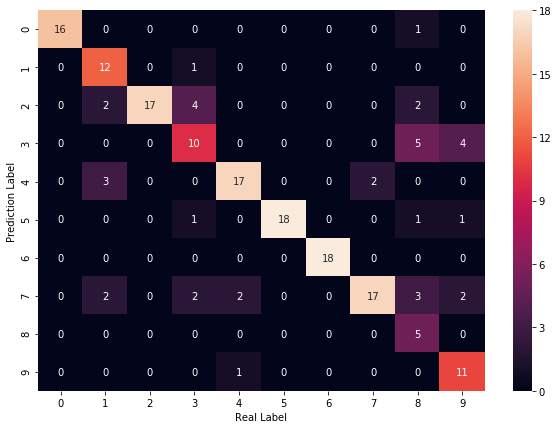

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:21 index:[5] real:5
#1 min_error:21 index:[2] real:2
#2 min_error:32 index:[7] real:8
#3 min_error:3 index:[0] real:0
#4 min_error:22 index:[1] real:1
#5 min_error:14 index:[7] real:7
#6 min_error:16 index:[6] real:6
#7 min_error:17 index:[3] real:3
#8 min_error:11 index:[2] real:2
#9 min_error:25 index:[1] real:1
#10 min_error:26 index:[7] real:7
#11 min_error:25 index:[7] real:4
#12 min_error:15 index:[6] real:6
#13 min_error:24 index:[3] real:3
#14 min_error:21 index:[1] real:1
#15 min_error:22 index:[3] real:3
#16 min_error:30 index:[7] real:9
#17 min_error:24 index:[1] real:1
#18 min_error:20 index:[7] real:7
#19 min_error:5 index:[6] real:6
#20 min_error:35 index:[0] real:8
#21 min_error:12 index:[4] real:4
#22 min_error:14 index:[3] real:3
#23 min_error:26 index:[1] real:1
#24 min_error:12 index:[4] real:4
#25 min_error:11 index:[0] real:0
#26 min_error:12 index:[5] real:5
#27 min_error:17 index:[3] real:3
#28 min_error:25 index:[6] real:6
#29 min_error:26 index:[3]

In [16]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8534322820037106
Avg Base Learner:0.8051886209029064


In [17]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:2060 Total connections::2471


In [18]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(26)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    
    # the index of maximum in each line
    return px_outputs

In [19]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        pred_outputs = get_pred_real(i, j)
        pred.append(pred_outputs)
    
    error = []
    for i in range(10):
        loss = 0
        for ii in range(len(pred)):
            #print(number_codes[0][ii], pred[ii][0])
            #print (pred[ii][0][number_codes[0][ii]])
            #loss += (1 - pred[ii][0][number_codes[i][ii]])**2
            z = pred[ii][0][number_codes[i][ii]]
            
            #loss += np.log(1 + np.exp(-z)) # c45
            #loss += np.exp(-z)# adaboost
            loss += (1-z)**2
        error.append(loss)
    
    pred_value.append(np.where(error==np.min(error)))

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.7888888888888889